---
# 1-Perkenalan

Bayu Pramana Putra, Batch 008

Objective:

- Regression

Dataset: Fifa 22

---
# 2-Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from feature_engine.outliers import Winsorizer

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

---

# 3-Data Loading

In [2]:
df00 = pd.read_csv('players_22.csv', sep=',')
pd.set_option('max_columns', None)

df00.head(5)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


Kita akan menggunakan Regresi untuk memprediksi Value dari seorang pemain sepakbola berdasarkan data yg ada pada Fifa 22.

Dengan Domain Knowledge yg dimiliki, kita bisa langsung mengeliminasi mana saja kolom-kolom yang tidak mempengaruhi Value dari seorang pemain.

Kolom-kolom tersebut adalah:
- sofifa_id
- semua kolom url
- long_name & short_name
- dob (karena sudah terwakili oleh age)
- club_joined (karena sudah terwakili oleh sisa durasi kontrak)
- nationality
- jersey number
- real_face
- semua kolom rating mulai dari ls sampai gk (karena sudah terwakili oleh overall dan potential)

In [3]:
hapusKolom = ['sofifa_id','player_url','long_name','short_name','dob','club_joined','club_team_id','club_jersey_number',
                'nationality_id','nation_team_id','nation_jersey_number','real_face',
                'player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm',
                'lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',
                'club_name','club_loaned_from','nationality_name']

df0 = df00.drop(hapusKolom, axis=1)

df0.head(5)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,French Ligue 1,1.0,RW,2023.0,RW,Left,4,4,5,Medium/Low,Unique,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,ST,92,92,119500000.0,270000.0,32,185,81,German 1. Bundesliga,1.0,ST,2023.0,RS,Right,4,4,5,High/Medium,Unique,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,"ST, LW",91,91,45000000.0,270000.0,36,187,83,English Premier League,1.0,ST,2023.0,ST,Right,4,5,5,High/Low,Unique,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,French Ligue 1,1.0,LW,2025.0,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,English Premier League,1.0,RCM,2025.0,RCM,Right,5,4,4,High/High,Unique,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN


---
# 4-Exploratory Data Analysis (EDA)

In [4]:
df0.sample(5)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
10456,"CDM, CM",65,74,1500000.0,4000.0,22,180,75,Holland Eredivisie,1.0,RES,2022.0,NaN,Right,4,3,1,Medium/Medium,Lean (170-185),2400000.0,NaN,Long Passer (AI),54.0,58.0,69.0,67.0,60.0,60.0,69,54,48,69,60,67,70,57,69,70,62,48,66,60,63,65,39,61,60,58,63,63,58,71,55,66,60,62,57,15,14,9,8,8,NaN
12377,"RWB, RB",63,65,550000.0,500.0,26,173,67,English National League,5.0,SUB,2023.0,NaN,Right,3,2,1,High/Medium,Normal (170-185),1200000.0,NaN,NaN,78.0,45.0,53.0,61.0,59.0,65.0,58,48,57,56,39,58,43,40,54,59,78,78,71,56,82,49,60,72,65,33,57,59,55,50,47,55,58,60,58,7,7,12,9,12,NaN
483,CM,80,84,30000000.0,41000.0,24,184,72,French Ligue 1,1.0,CM,2026.0,NaN,Left,2,3,2,Medium/Medium,Normal (170-185),59300000.0,NaN,NaN,74.0,64.0,79.0,80.0,78.0,77.0,73,61,54,86,56,77,79,60,79,84,73,74,79,84,81,69,68,77,76,65,81,81,74,77,67,78,79,82,78,14,13,13,9,9,NaN
6334,"CDM, CB",69,76,2600000.0,5000.0,23,187,80,Korean K League 1,1.0,LDM,2022.0,NaN,Right,3,2,1,Medium/High,Normal (185+),3900000.0,NaN,NaN,63.0,47.0,58.0,58.0,68.0,77.0,48,45,65,70,25,56,21,24,67,60,65,61,64,63,56,55,74,88,75,51,68,70,54,59,36,56,66,70,65,6,14,6,10,11,NaN
12527,"CAM, ST",63,66,625000.0,1000.0,25,192,78,German 3. Bundesliga,3.0,CAM,2022.0,NaN,Right,4,3,1,High/Medium,Lean (185+),953000.0,NaN,NaN,72.0,61.0,60.0,63.0,34.0,68.0,52,61,63,64,55,66,59,63,54,65,68,76,60,59,44,60,58,75,73,62,47,20,57,65,61,54,38,32,23,7,13,7,12,14,NaN


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 63 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_positions             19239 non-null  object 
 1   overall                      19239 non-null  int64  
 2   potential                    19239 non-null  int64  
 3   value_eur                    19165 non-null  float64
 4   wage_eur                     19178 non-null  float64
 5   age                          19239 non-null  int64  
 6   height_cm                    19239 non-null  int64  
 7   weight_kg                    19239 non-null  int64  
 8   league_name                  19178 non-null  object 
 9   league_level                 19178 non-null  float64
 10  club_position                19178 non-null  object 
 11  club_contract_valid_until    19178 non-null  float64
 12  nation_position              759 non-null    object 
 13  preferred_foot  

> Membagi kolom numerik dan kategorik

In [6]:
num_cols = df0.select_dtypes(include=np.number).columns.tolist()
cat_cols = df0.select_dtypes(include=['object']).columns.tolist()

print('Kolom Numerik: ', num_cols)
print('Kolom Kategorik: ', cat_cols)

Kolom Numerik:  ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'league_level', 'club_contract_valid_until', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeep

> mencari setiap value pada kolom kategorik

In [7]:
df0[cat_cols].describe()

,player_positions,league_name,club_position,nation_position,preferred_foot,work_rate,body_type,player_tags,player_traits
count,19239,19178,19178,759,19239,19239,19239,1441,9398
unique,674,55,29,28,2,9,10,71,1051
top,CB,USA Major League Soccer,SUB,SUB,Right,Medium/Medium,Normal (170-185),#Strength,Speed Dribbler (AI)
freq,2423,771,8299,396,14674,10015,6685,494,711


In [8]:
for col in cat_cols:
    print('Kolom: ', col)
    print(df0[col].value_counts())
    print('---')
    print(' ')

Kolom:  player_positions
CB              2423
GK              2132
ST              1770
CDM, CM          953
CM               726
                ... 
CAM, CDM, ST       1
CDM, RWB, CB       1
ST, CAM, RW        1
ST, CF, RM         1
CDM, LM, LB        1
Name: player_positions, Length: 674, dtype: int64
---
 
Kolom:  league_name
USA Major League Soccer                 771
Argentina Primera División              727
English League Championship             717
English Premier League                  652
Spain Primera Division                  633
English League One                      626
Spanish Segunda División                625
English League Two                      613
Japanese J. League Division 1           589
French Ligue 1                          577
Italian Serie A                         563
German 1. Bundesliga                    551
Turkish Süper Lig                       543
German 3. Bundesliga                    542
French Ligue 2                          529
German 2

In [9]:
df0[cat_cols].isna().sum()

player_positions        0
league_name            61
club_position          61
nation_position     18480
preferred_foot          0
work_rate               0
body_type               0
player_tags         17798
player_traits        9841
dtype: int64

- Pada kolom player_positions, player_tags, dan player_traits akan dilakukan feature engineering guna menyederhanakan klasifikasi.

- NaN pada kolom league_name dan club_position berarti pemain tsb berstatus tanpa klub atau bebas transfer.

- NaN pada kolom nation_position berarti pemain tsb tidak terpilih oleh Timnas negaranya.

- NaN pada kolom player_tags dan player_traits berarti bahwa pemain tsb tidak memiliki skill atau kemampuan khusus.

- Dengan demikian, maka Missing Value pada kolom kategorik akan dibiarkan.

> statistik pada kolom numerik

In [10]:
df0[num_cols].describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,1.354364,2022.764000,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,0.747865,1.213203,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,1.000000,2022.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000000,56.000000,48.000000,57.000000,56.000000,57.000000,32.000000,44.000000,26.000000,40.000000,45.000000,38.000000,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1.000000,2022.000000,3.000000,2.000000,1.000000,1.600000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,54.000000,50.00000

In [11]:
df0[num_cols].isna().sum()

overall                            0
potential                          0
value_eur                         74
wage_eur                          61
age                                0
height_cm                          0
weight_kg                          0
league_level                      61
club_contract_valid_until         61
weak_foot                          0
skill_moves                        0
international_reputation           0
release_clause_eur              1176
pace                            2132
shooting                        2132
passing                         2132
dribbling                       2132
defending                       2132
physic                          2132
attacking_crossing                 0
attacking_finishing                0
attacking_heading_accuracy         0
attacking_short_passing            0
attacking_volleys                  0
skill_dribbling                    0
skill_curve                        0
skill_fk_accuracy                  0
s

In [12]:
dfna = df0[num_cols].fillna(-9999)

dfna.query('value_eur==-9999')

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
147,83,83,-9999.0,-9999.0,32,186,81,-9999.0,-9999.0,3,2,3,-9999.0,58.0,55.0,70.0,67.0,86.0,77.0,64,45,81,77,38,62,63,59,81,75,55,60,54,85,62,78,81,76,77,58,79,85,52,62,58,86,87,87,84,16,6,14,16,14,-9999.0
416,80,80,-9999.0,-9999.0,31,187,84,-9999.0,-9999.0,3,3,3,-9999.0,68.0,76.0,72.0,72.0,75.0,81.0,63,72,75,78,75,70,54,62,81,79,67,69,59,80,53,82,74,78,83,78,80,77,72,69,78,80,75,76,72,15,14,8,6,7,-9999.0
694,78,78,-9999.0,-9999.0,32,196,91,-9999.0,-9999.0,3,3,2,-9999.0,65.0,78.0,69.0,71.0,29.0,86.0,61,81,87,77,74,73,66,60,57,77,63,66,55,75,35,79,65,78,94,69,80,30,81,77,75,79,25,17,21,15,12,11,11,8,-9999.0
926,77,78,-9999.0,-9999.0,28,184,78,-9999.0,-9999.0,3,3,1,-9999.0,75.0,70.0,72.0,76.0,73.0,76.0,65,69,57,78,45,77,58,56,76,76,73,77,80,73,74,81,67,78,75,74,77,75,68,74,54,72,73,76,73,11,8,16,16,15,-9999.0
1146,76,76,-9999.0,-9999.0,37,180,75,-9999.0,-9999.0,2,4,2,-9999.0,73.0,70.0,75.0,77.0,73.0,68.0,78,66,57,77,67,78,79,74,72,77,72,73,75,74,73,74,54,66,67,74,74,74,75,72,72,81,75,74,76,6,6,14,7,10,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14654,61,62,-9999.0,-9999.0,26,183,63,-9999.0,-9999.0,3,3,1,-9999.0,77.0,60.0,54.0,62.0,42.0,57.0,54,61,43,57,52,62,49,40,55,62,78,76,66,48,68,67,49,62,56,52,56,39,65,55,54,53,46,38,44,11,12,10,6,7,-9999.0
16209,59,59,-9999.0,700.0,54,177,72,1.0,2022.0,4,3,1,-9999.0,30.0,63.0,55.0,62.0,19.0,46.0,44,66,56,61,62,64,69,54,36,68,29,30,29,46,67,59,32,30,56,61,45,16,71,66,59,78,16,13,13,6,14,8,6,7,-9999.0
16505,58,58,-9999.0,2000.0,42,185,76,4.0,2022.0,3,2,1,-9999.0,42.0,63.0,59.0,62.0,43.0,68.0,61,60,61,58,63,62,63,62,51,61,43,42,60,62,67,69,68,33,83,67,75,53,62,61,60,68,41,36,34,7,11,6,14,6,-9999.0
16506,58,58,-9999.0,800.0,41,175,76,1.0,2022.0,4,3,2,-9999.0,30.0,55.0,62.0,59.0,38.0,49.0,56,56,46,64,49,60,58,60,61,64,30,30,36,38,68,57,32,24,60,50,55,36,70,65,58,72,41,36,31,8,10,9,6,11,-9999.0


- Ternyata nilai NaN pada kolom value_eur merujuk pada pemain dengan kondisi tanpa klub dan/atau pemain yg sudah berusia sangat tua. Dengan kata lain, nilai NaN pada value_eur dan wage_eur bisa diganti dan harus diganti dengan angka nol.

- Nilai NaN pada kolom league_level menandakan pemain tsb tidak memiliki klub profesional, sehingga akan diganti dengan angka 6. (angka 5 adalah nilai maksimal pada dataset yg menandakan pemain bermain di kub yg berada pada kasta liga terendah, sedangkan angka 1 menandakan kasta liga tertinggi)

- Nilai NaN pada kolom club_contract_valid_until akan diganti dengan angka 2020 (artinya kontrak sang pemain telah berakhir setidaknya tahun lalu, karena tahun terkecil yg bernilai tidak NaN adalah 2021)

- Nilai NaN pada kolom release_clause_eur akan diganti dengan angka nol karena bermakna pemain berstatus tanpa klub dan tidak memiliki nilai jual berdasarkan kontrak.

- Nilai NaN pada kolom goalkeeping_speed sejauh ini belum diketahui akan diberikan perlakuan bagaimana.

In [13]:
dfna.query('pace==-9999')

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
5,91,93,112000000.0,130000.0,28,188,87,1.0,2023.0,3,1,5,238000000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0
7,90,90,13500000.0,86000.0,35,193,93,1.0,2023.0,4,1,5,22300000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0
8,90,92,99000000.0,250000.0,29,187,85,1.0,2025.0,4,1,4,210400000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,18,14,11,61,14,21,18,12,63,30,38,50,39,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,43.0
12,89,91,85500000.0,250000.0,29,199,96,1.0,2026.0,3,1,4,181700000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,14,14,13,33,12,13,19,20,35,23,42,52,62,84,45,56,68,38,70,17,23,15,13,44,27,66,20,18,16,84,89,74,86,88,46.0
18,89,91,94000000.0,200000.0,27,188,86,1.0,2026.0,3,1,3,181000000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,20,14,14,61,18,23,15,20,66,40,64,63,60,88,48,70,66,41,78,18,38,27,20,70,51,70,29,15,8,87,82,93,88,88,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,48,54,60000.0,800.0,20,182,70,1.0,2021.0,2,1,1,105000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,13,8,12,14,7,8,12,16,15,9,26,22,32,32,43,38,54,22,56,9,22,18,16,29,15,33,12,15,16,46,49,51,48,51,24.0
19216,48,65,110000.0,1000.0,19,180,72,2.0,2023.0,2,1,1,278000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,12,5,12,29,5,5,10,11,20,14,35,30,37,41,48,37,64,28,42,5,22,14,7,26,16,23,9,12,13,52,49,49,43,48,33.0
19225,47,55,90000.0,500.0,21,175,77,1.0,2025.0,2,1,1,140000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,11,7,10,26,8,13,10,10,24,12,30,21,31,47,41,34,56,27,53,7,21,10,5,27,18,22,6,12,12,48,45,45,46,47,26.0
19227,47,67,110000.0,500.0,18,186,74,1.0,2022.0,3,1,1,259000.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,13,8,10,22,8,10,11,13,18,13,20,18,26,45,44,29,45,19,34,5,24,6,6,31,19,23,7,14,13,49,41,39,45,49,19.0


In [14]:
df0.head(10)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,French Ligue 1,1.0,RW,2023.0,RW,Left,4,4,5,Medium/Low,Unique,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN
1,ST,92,92,119500000.0,270000.0,32,185,81,German 1. Bundesliga,1.0,ST,2023.0,RS,Right,4,4,5,High/Medium,Unique,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN
2,"ST, LW",91,91,45000000.0,270000.0,36,187,83,English Premier League,1.0,ST,2023.0,ST,Right,4,5,5,High/Low,Unique,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN
3,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,French Ligue 1,1.0,LW,2025.0,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...","Injury Prone, Flair, Speed Dribbler (AI), Play...",91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN
4,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,English Premier League,1.0,RCM,2025.0,RCM,Right,5,4,4,High/High,Unique,232200000.0,"#Dribbler, #Playmaker, #Engine, #Distance Shoo...","Injury Prone, Leadership, Early Crosser, Long ...",76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN
5,GK,91,93,112000000.0,130000.0,28,188,87,Spain Primera Division,1.0,GK,2023.0,NaN,Right,3,1,5,Medium/Medium,Unique,238000000.0,NaN,"GK Long Throw, Comes For Crosses",NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,90,50.0
6,"ST, LW",91,95,194000000.0,230000.0,22,182,73,French Ligue 1,1.0,ST,2022.0,LW,Right,4,5,4,High/Low,Unique,373500000.0,"#Speedster, #Dribbler, #Acrobat, #Clinical Fin...","Flair, Speed Dribbler (AI), Outside Foot Shot,...",97.0,88.0,80.0,92.0,36.0,77.0,78,93,72,85,83,93,80,69,71,91,97,97,92,93,83,86,78,88,77,82,62,38,92,82,79,88,26,34,32,13,5,7,11,6,NaN
7,GK,90,90,13500000.0,86000.0,35,193,93,German 1. Bundesliga,1.0,GK,2023.0,GK,Right,4,1,5,Medium/Medium,Unique,22300000.0,NaN,"Leadership, GK Long Throw, Rushes Out Of Goal,...",NaN,NaN,NaN,NaN,NaN,NaN,15,13,25,60,11,30,14,11,68,46,54,60,51,87,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,88,88,91,89,88,56.0
8,GK,90,92,99000000.0,250000.0,29,187,85,Spain Primera Division,1.0,GK,2025.0,NaN,Right,4,1,4,Medium/Medium,Unique,210400000.0,NaN,"Rushes Out Of Goal, Comes For Crosses, Saves w...",NaN

- Nilai NaN pada kolom pace, shooting, passing, dribbling, defending, dan physic menandakan bahwasanya pemain tsb adalah seorang penjaga gawang. Nilai pada kolom ini tidak akan dilakukan imputasi apapun, namun setiap data di kolom ini akan dihapus/dipisahkan dari data utama, untuk membedakan model regresi pada pemain penjaga gawang dan non-penjaga gawang.

- Kolom GoalKeeping_speed pada data utama akan dihapus, karena kolom tsb hanya berpengaruh pada posisi penjaga gawang.

> Memisahkan antara data utama dan data penjaga gawang

In [15]:
dfgk = df0.query('player_positions=="GK"')
df = df0.drop(dfgk.index)
df = df.drop('goalkeeping_speed', axis=1)

df.reset_index(drop=True, inplace=True)
dfgk.reset_index(drop=True, inplace=True)

dfgk.sample(5)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
493,GK,70,74,1700000.0,27000.0,26,186,76,Belgian Jupiler Pro League,1.0,RES,2022.0,GK,Right,2,1,1,Medium/Medium,Lean (185+),NaN,NaN,Comes For Crosses,NaN,NaN,NaN,NaN,NaN,NaN,18,14,17,26,13,13,17,14,25,32,45,46,43,61,55,54,59,41,56,15,23,12,16,39,22,42,12,19,15,71,68,72,68,71,45.0
202,GK,74,74,725000.0,32000.0,34,196,91,Scottish Premiership,1.0,GK,2024.0,NaN,Right,3,1,2,Medium/Medium,Normal (185+),1300000.0,NaN,Cautious With Crosses,NaN,NaN,NaN,NaN,NaN,NaN,14,14,10,34,19,23,17,13,35,20,46,53,50,70,32,50,69,28,61,19,36,25,14,42,30,58,16,14,13,68,76,66,75,76,49.0
709,GK,67,67,325000.0,7000.0,33,192,91,English League Championship,2.0,SUB,2022.0,NaN,Right,3,1,1,Medium/Medium,Normal (185+),618000.0,NaN,Comes For Crosses,NaN,NaN,NaN,NaN,NaN,NaN,11,20,11,28,14,18,13,12,32,23,45,45,50,63,56,50,54,35,64,18,34,23,13,46,22,54,15,12,12,68,62,66,66,68,45.0
2112,GK,49,65,110000.0,1000.0,20,190,75,Chinese Super League,1.0,RES,2022.0,NaN,Right,3,1,1,Medium/Medium,Lean (185+),239000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,9,13,19,8,9,13,12,26,11,27,15,22,47,28,35,41,22,49,6,22,13,8,43,17,25,6,14,13,48,48,46,49,49,22.0
1833,GK,56,74,325000.0,500.0,19,201,88,USA Major League Soccer,1.0,SUB,2022.0,NaN,Right,3,1,1,Medium/Medium,Normal (185+),691000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,6,12,26,8,11,11,13,17,15,26,16,24,48,29,42,37,18,72,5,19,7,6,33,17,25,5,14,13,59,57,56,47,59,22.0


In [16]:
df.sample(5)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
9553,"LB, LM",65,74,1500000.0,3000.0,22,174,64,German 2. Bundesliga,2.0,RAM,2022.0,NaN,Left,3,3,1,High/High,Lean (170-185),NaN,NaN,NaN,73.0,46.0,61.0,70.0,57.0,61.0,68,46,42,65,37,70,59,58,56,69,77,70,73,61,81,55,58,76,55,39,57,59,54,52,38,58,56,61,59,13,8,7,14,8
4116,CB,71,76,2600000.0,11000.0,24,193,75,Belgian Jupiler Pro League,1.0,LCB,2025.0,NaN,Right,3,2,1,Medium/High,Lean (185+),4100000.0,NaN,Long Passer (AI),71.0,49.0,63.0,61.0,70.0,75.0,58,52,78,71,52,54,45,39,70,68,70,72,64,68,68,47,77,75,80,47,63,70,46,60,45,65,71,69,65,7,9,13,14,8
14578,"LM, RM",59,70,500000.0,4000.0,22,176,71,English League Championship,2.0,SUB,2022.0,NaN,Left,4,3,1,High/Medium,Lean (170-185),1100000.0,NaN,NaN,69.0,53.0,53.0,62.0,24.0,43.0,57,52,39,57,48,64,44,41,46,61,68,69,62,55,75,59,49,39,49,50,31,22,52,54,54,46,22,24,22,13,12,8,8,10
7135,"LM, LW",67,70,1400000.0,3000.0,24,172,70,Austrian Football Bundesliga,1.0,CAM,2023.0,NaN,Right,4,3,1,High/Low,Normal (170-185),2100000.0,NaN,Long Shot Taker (AI),72.0,64.0,62.0,71.0,24.0,57.0,62,60,44,62,70,71,68,56,60,68,73,72,82,62,79,70,62,63,47,68,72,26,64,63,60,65,19,23,19,14,13,9,9,8
12285,CB,62,65,475000.0,2000.0,25,182,72,English League Two,4.0,RCB,2022.0,NaN,Right,3,2,1,Medium/Medium,Normal (170-185),867000.0,NaN,Solid Player,56.0,31.0,37.0,41.0,62.0,73.0,28,29,62,50,28,31,29,24,43,44,52,60,51,59,65,45,86,81,70,19,67,62,39,26,32,57,63,63,60,8,10,7,6,15


Sekarang kita hanya akan fokus pada data pemain non-penjaga gawang

In [17]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print('Kolom Numerik: ', num_cols)
print('---')
print('Kolom Kategorik: ', cat_cols)

Kolom Numerik:  ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'league_level', 'club_contract_valid_until', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeep

In [18]:
df[num_cols].isna().sum()

overall                           0
potential                         0
value_eur                        66
wage_eur                         53
age                               0
height_cm                         0
weight_kg                         0
league_level                     53
club_contract_valid_until        53
weak_foot                         0
skill_moves                       0
international_reputation          0
release_clause_eur             1087
pace                              0
shooting                          0
passing                           0
dribbling                         0
defending                         0
physic                            0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing          

In [19]:
df[cat_cols].isna().sum()

player_positions        0
league_name            53
club_position          53
nation_position     16447
preferred_foot          0
work_rate               0
body_type               0
player_tags         15666
player_traits        8530
dtype: int64

In [20]:
df[num_cols].describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,17107.000000,17107.000000,1.704100e+04,17054.000000,17107.000000,17107.000000,17107.000000,17054.000000,17054.000000,17107.000000,17107.000000,17107.000000,1.602000e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
mean,65.940726,71.240603,2.965082e+06,9350.281459,25.087683,180.398141,74.101245,1.356515,2022.776651,3.001578,2.521015,1.095516,5.594176e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,54.032092,50.252470,56.503420,62.827907,46.359736,60.954112,51.364412,45.792600,56.425440,63.371836,68.182966,68.216520,66.567545,61.877828,66.847080,59.189162,65.831063,67.286140,65.660022,51.035015,59.273514,50.500438,55.346233,55.847782,51.506752,60.049278,50.716666,52.322324,49.929912,10.348278,10.394400,10.360905,10.374408,10.331209
std,6.771037,6.047204,7.717024e+06,19874.070926,4.628755,6.544951,6.698788,0.750159,1.218475,0.649625,0.637464,0.372685,1.512318e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,13.604061,16.244041,11.558852,9.303342,14.530133,11.891961,14.753127,14.710135,11.961427,9.540133,11.418245,11.226264,12.173842,8.707776,12.099011,13.187949,11.779205,11.253549,12.698407,15.722801,13.851654,18.439604,14.270299,12.601153,12.406456,10.266863,17.369196,18.457431,18.362541,3.014356,2.996763,3.038509,3.003612,3.034192
min,47.000000,49.000000,1.500000e+04,500.000000,16.000000,155.000000,49.000000,1.000000,2021.000000,1.000000,2.000000,1.000000,2.300000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,15.000000,10.000000,17.000000,23.000000,10.000000,16.000000,12.000000,10.000000,20.000000,24.000000,27.000000,27.000000,25.000000,29.000000,26.000000,20.000000,29.000000,24.000000,19.000000,11.000000,20.000000,10.000000,12.000000,13.000000,13.000000,30.000000,10.000000,10.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,62.000000,67.000000,5.250000e+05,1000.000000,21.000000,176.000000,70.000000,1.000000,2022.000000,3.000000,2.000000,1.000000,8.750000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,45.000000,37.000000,48.000000,58.000000,34.000000,55.000000,40.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,58.000000,60.000000,58.000000,39.000000,50.000000,35.000000,48.000000,48.000000,42.000000,53.000000,37.000000,37.000000,34.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,1.000000e+06,3000.000000,25.000000,180.000000,74.000000,1.000000,2023.000000,3.000000,2.000000,1.000000,1.700000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,56.000000,53.000000,57.000000,64.000000,46.000000,63.000000,52.000000,43.00000

In [21]:
df[cat_cols].describe()

,player_positions,league_name,club_position,nation_position,preferred_foot,work_rate,body_type,player_tags,player_traits
count,17107,17054,17054,660,17107,17107,17107,1441,8577
unique,673,55,28,27,2,9,10,71,945
top,CB,USA Major League Soccer,SUB,SUB,Right,Medium/Medium,Normal (170-185),#Strength,Speed Dribbler (AI)
freq,2423,680,7360,330,12776,7883,6386,494,711


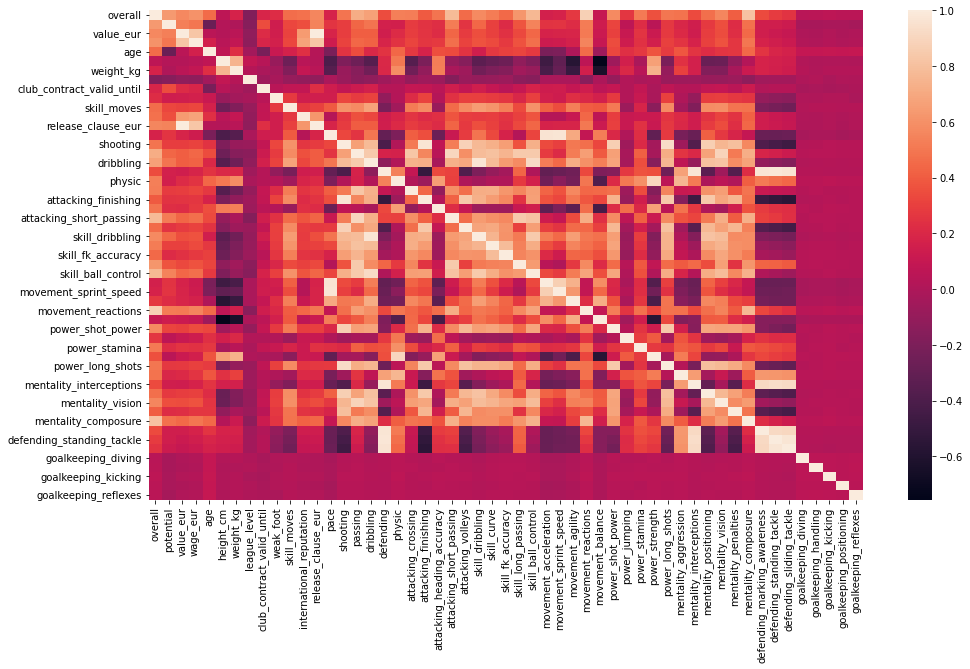

In [22]:
plt.figure(figsize=(16,9))
sns.heatmap(df[num_cols].corr(), annot=False)
plt.show()

> Mengecek distribusi data dan keberadaan outliers

---
Pada kolom overall , skewness= 0.07


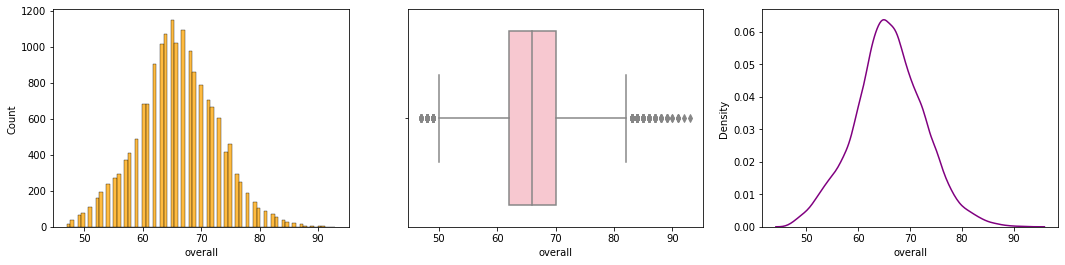

---
Pada kolom potential , skewness= 0.17


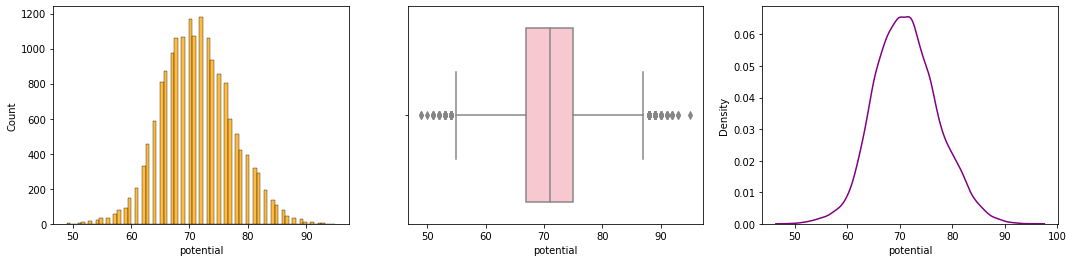

---
Pada kolom value_eur , skewness= 7.99


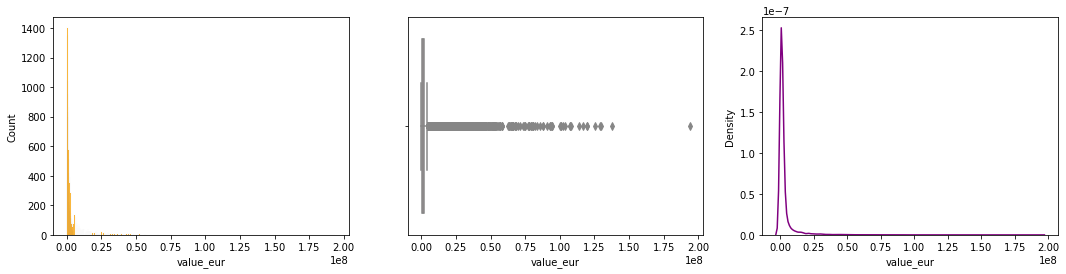

---
Pada kolom wage_eur , skewness= 6.35


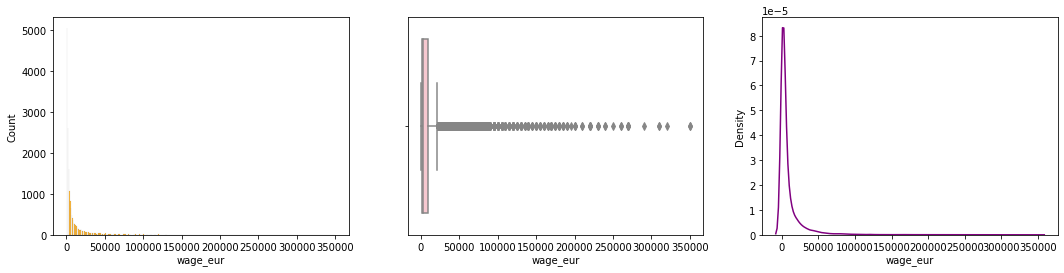

---
Pada kolom age , skewness= 0.4


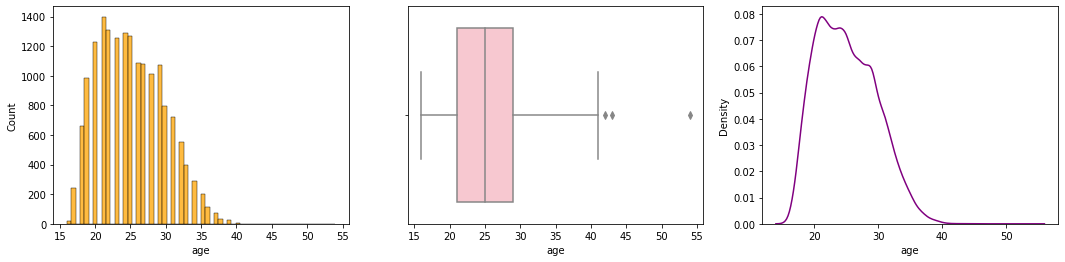

---
Pada kolom height_cm , skewness= -0.02


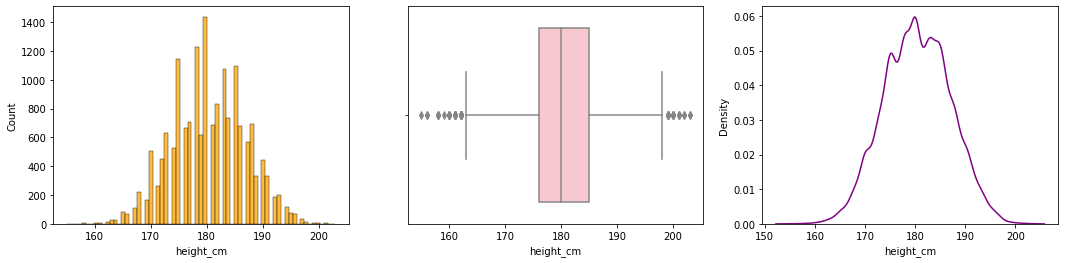

---
Pada kolom weight_kg , skewness= 0.22


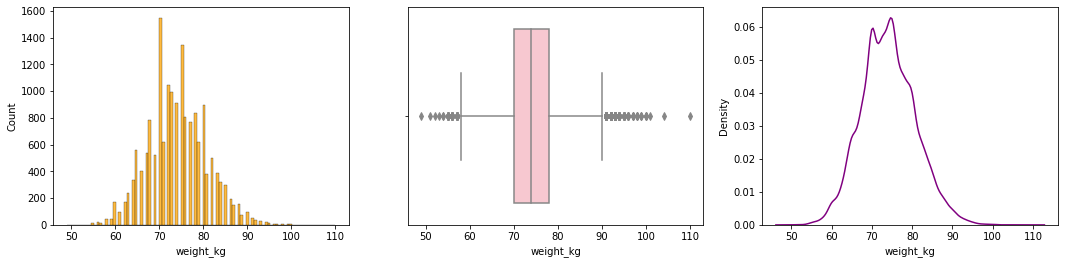

---
Pada kolom league_level , skewness= 2.22


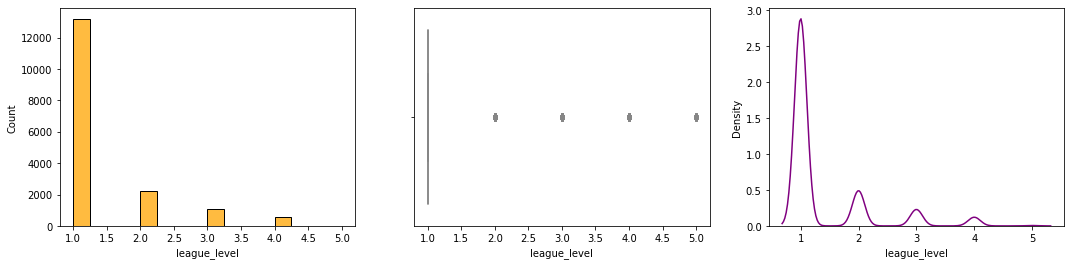

---
Pada kolom club_contract_valid_until , skewness= 0.66


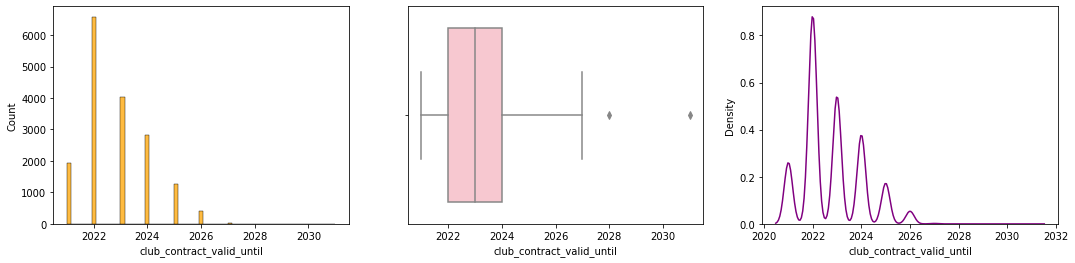

---
Pada kolom weak_foot , skewness= 0.31


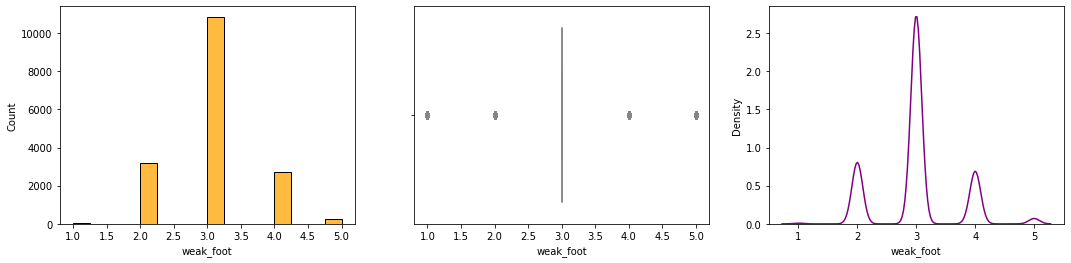

---
Pada kolom skill_moves , skewness= 0.9


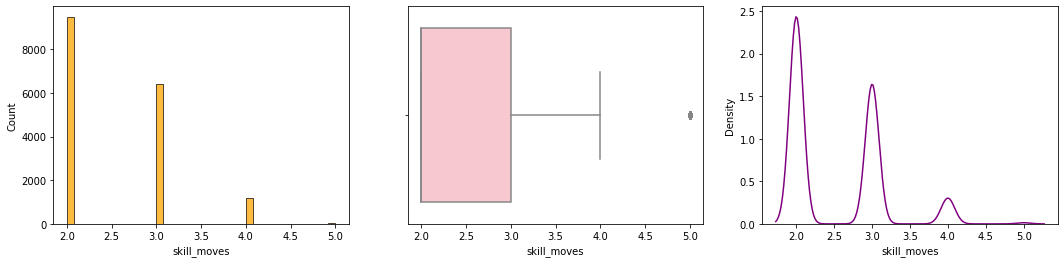

---
Pada kolom international_reputation , skewness= 4.62


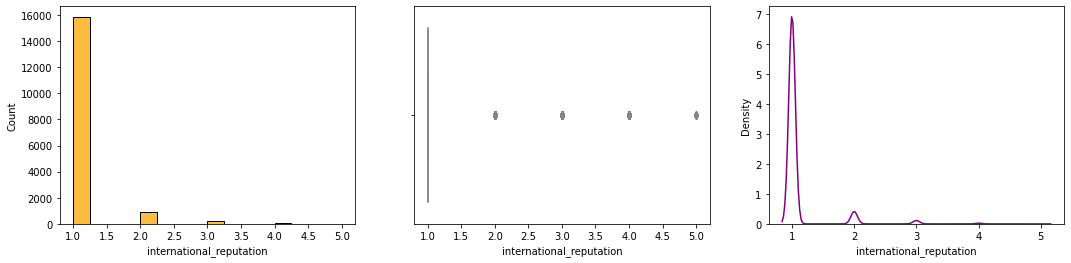

---
Pada kolom release_clause_eur , skewness= 7.84


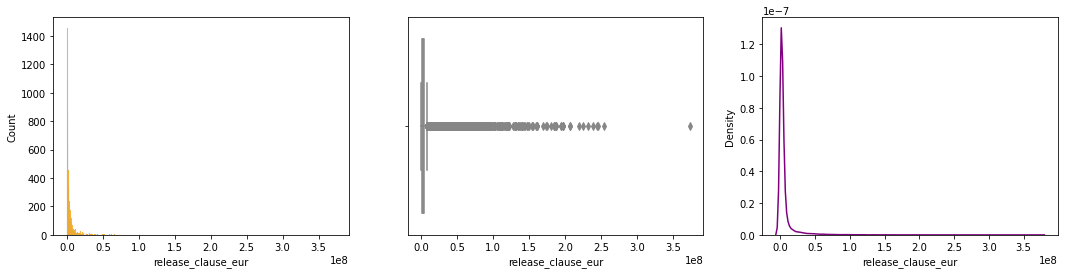

---
Pada kolom pace , skewness= -0.57


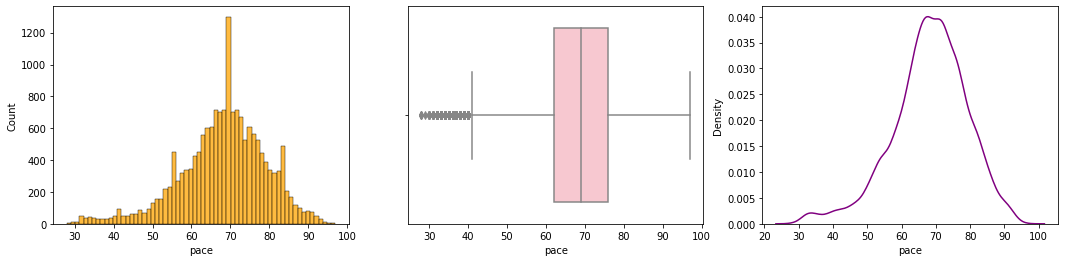

---
Pada kolom shooting , skewness= -0.28


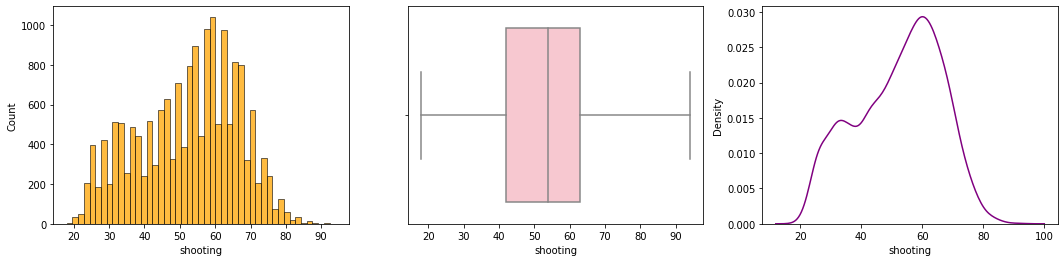

---
Pada kolom passing , skewness= -0.16


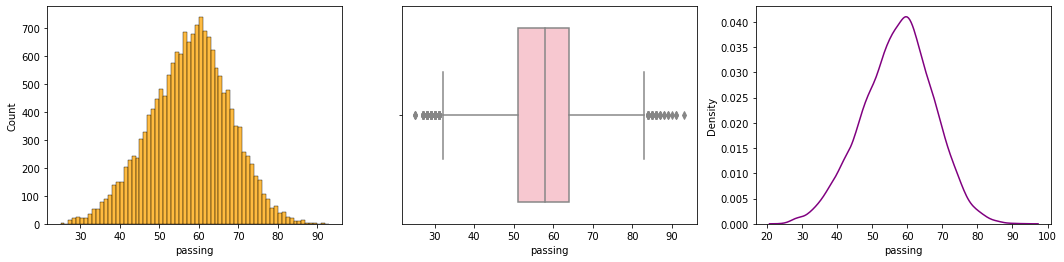

---
Pada kolom dribbling , skewness= -0.49


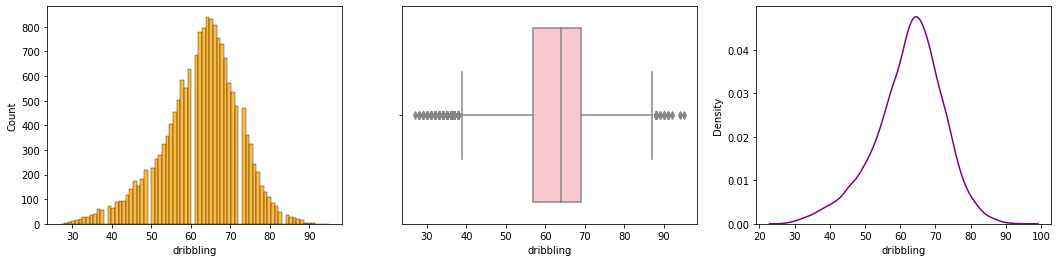

---
Pada kolom defending , skewness= -0.41


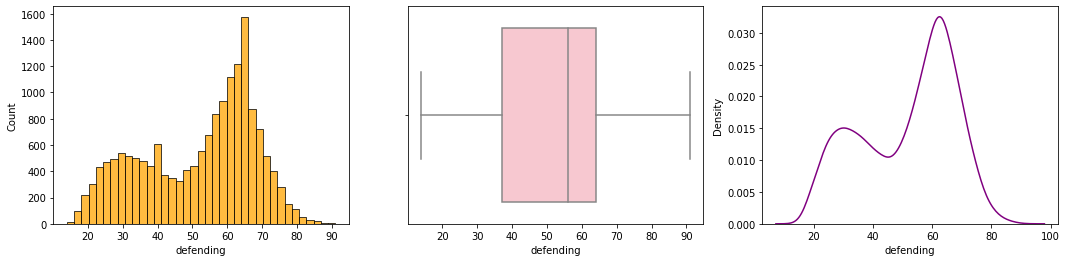

---
Pada kolom physic , skewness= -0.45


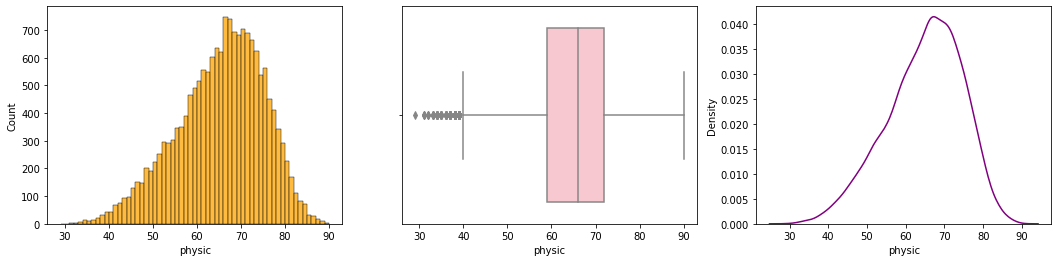

---
Pada kolom attacking_crossing , skewness= -0.37


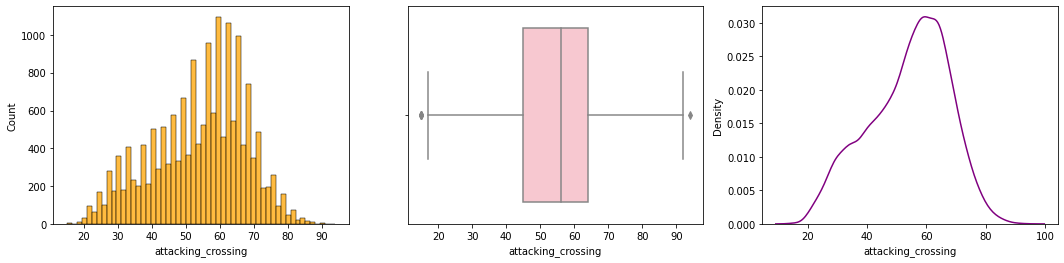

---
Pada kolom attacking_finishing , skewness= -0.26


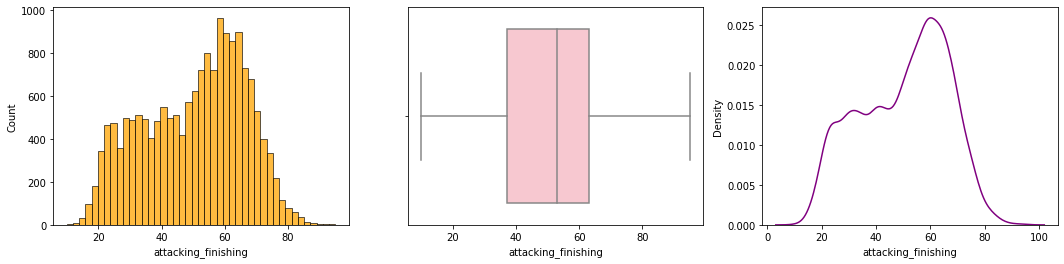

---
Pada kolom attacking_heading_accuracy , skewness= -0.08


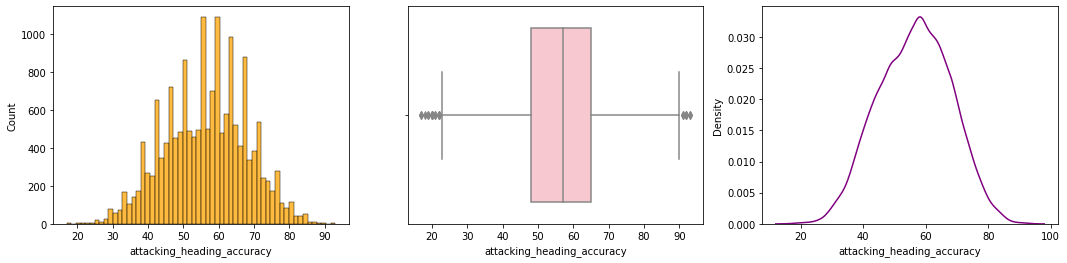

---
Pada kolom attacking_short_passing , skewness= -0.51


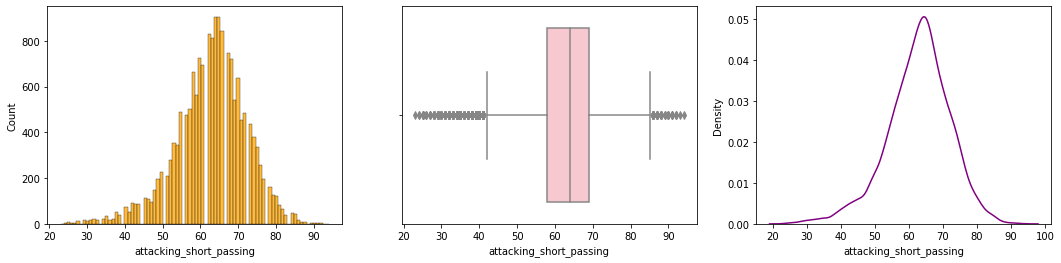

---
Pada kolom attacking_volleys , skewness= 0.14


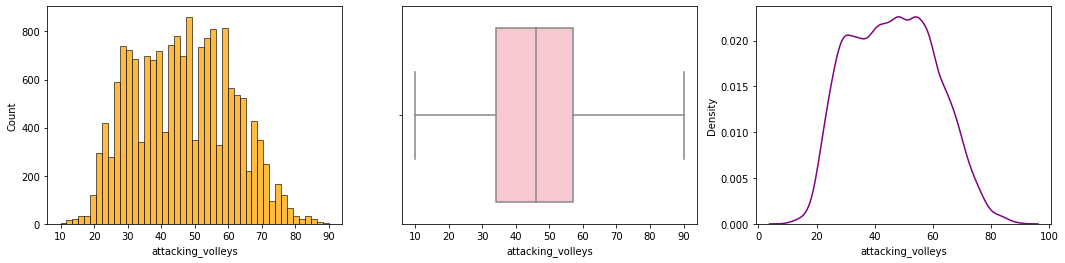

---
Pada kolom skill_dribbling , skewness= -0.76


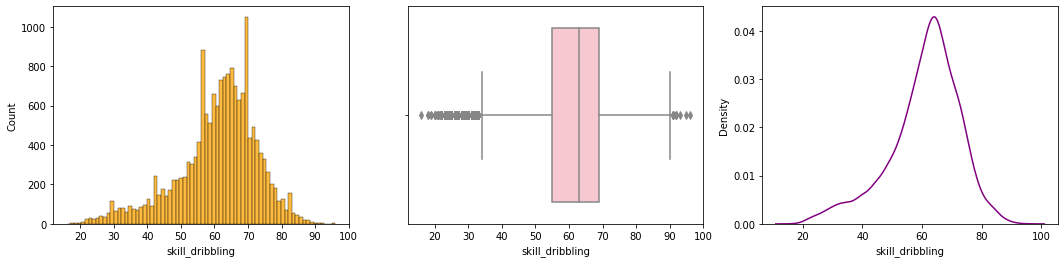

---
Pada kolom skill_curve , skewness= 0.01


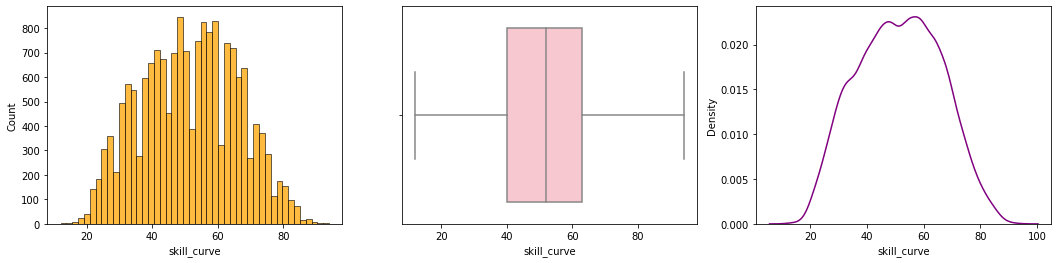

---
Pada kolom skill_fk_accuracy , skewness= 0.4


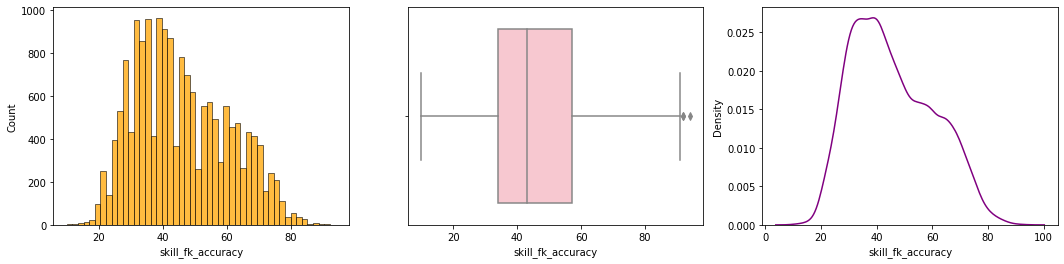

---
Pada kolom skill_long_passing , skewness= -0.43


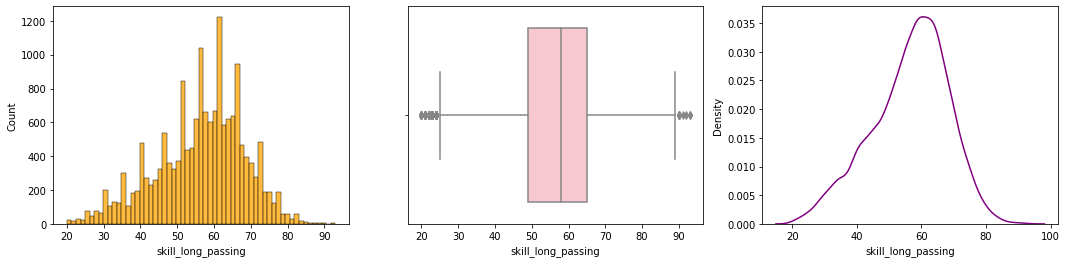

---
Pada kolom skill_ball_control , skewness= -0.54


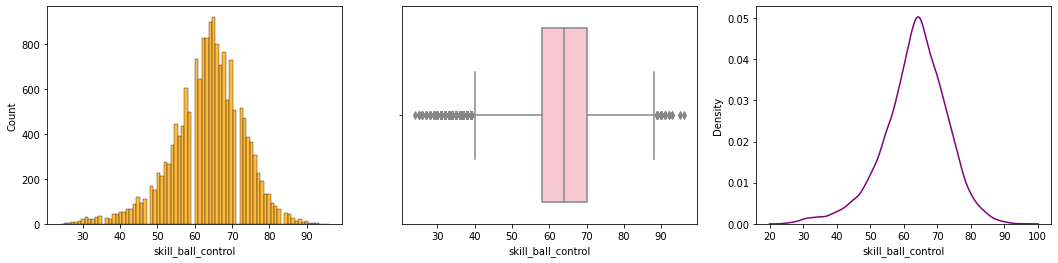

---
Pada kolom movement_acceleration , skewness= -0.59


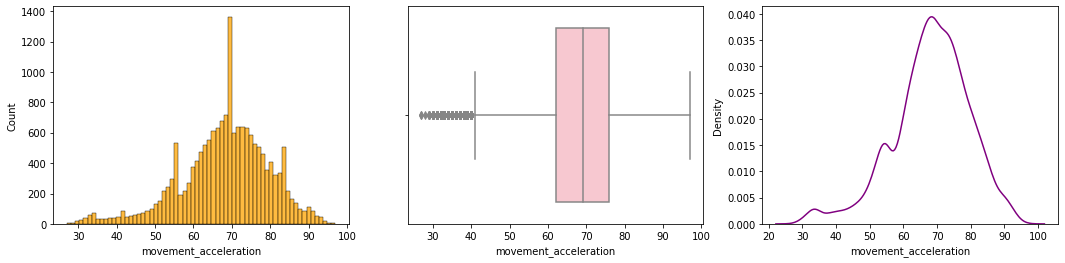

---
Pada kolom movement_sprint_speed , skewness= -0.61


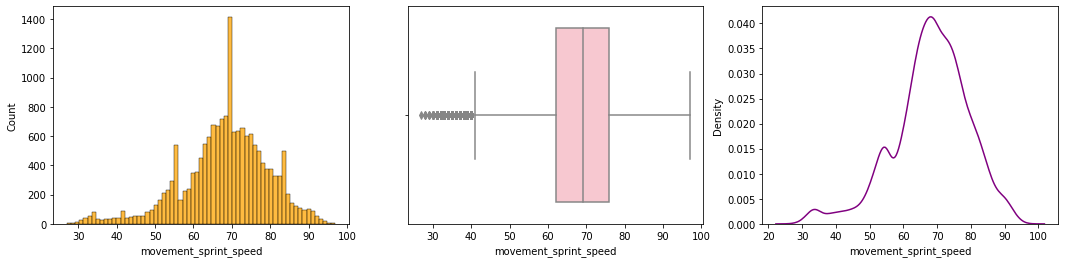

---
Pada kolom movement_agility , skewness= -0.46


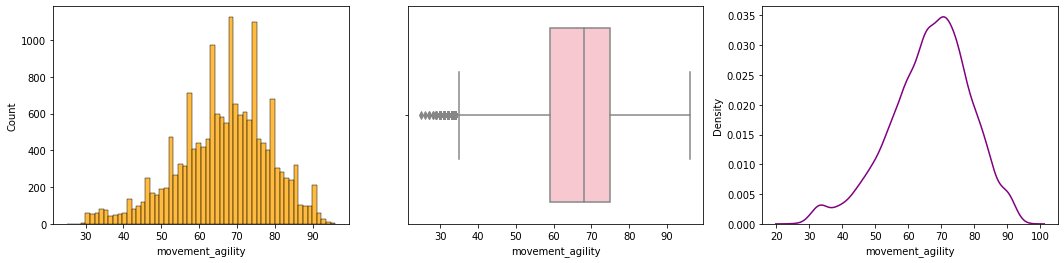

---
Pada kolom movement_reactions , skewness= 0.01


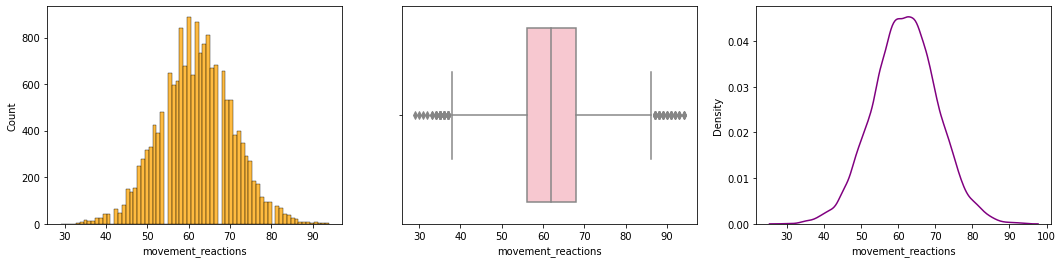

---
Pada kolom movement_balance , skewness= -0.53


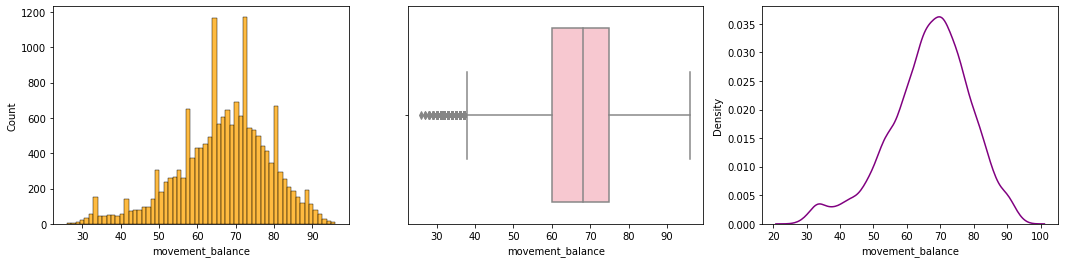

---
Pada kolom power_shot_power , skewness= -0.45


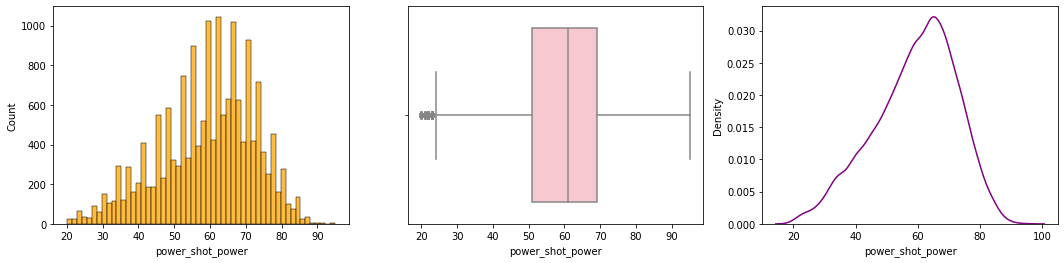

---
Pada kolom power_jumping , skewness= -0.37


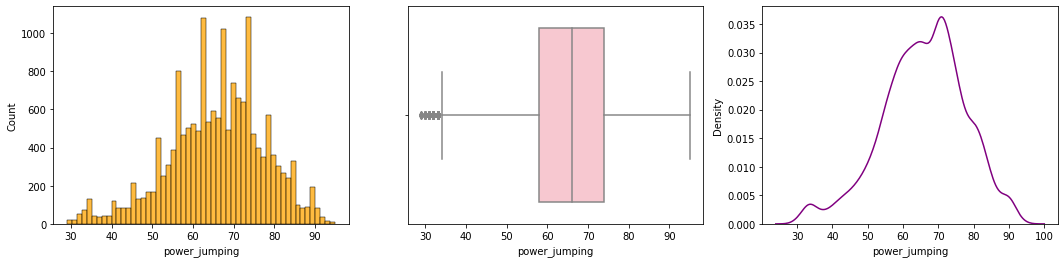

---
Pada kolom power_stamina , skewness= -0.42


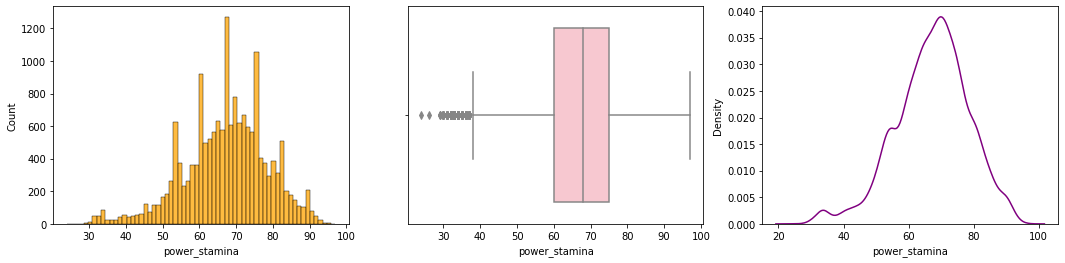

---
Pada kolom power_strength , skewness= -0.45


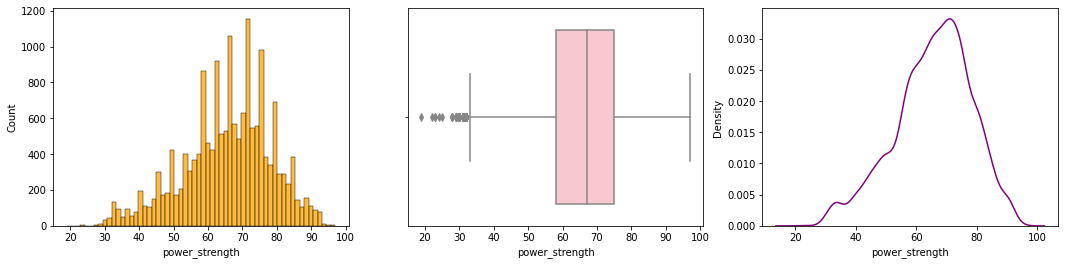

---
Pada kolom power_long_shots , skewness= -0.34


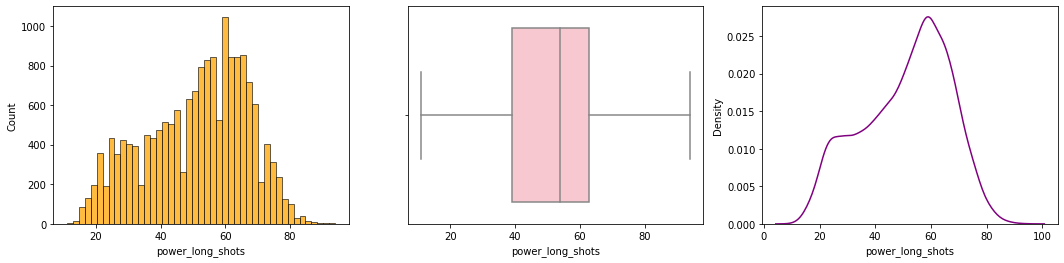

---
Pada kolom mentality_aggression , skewness= -0.31


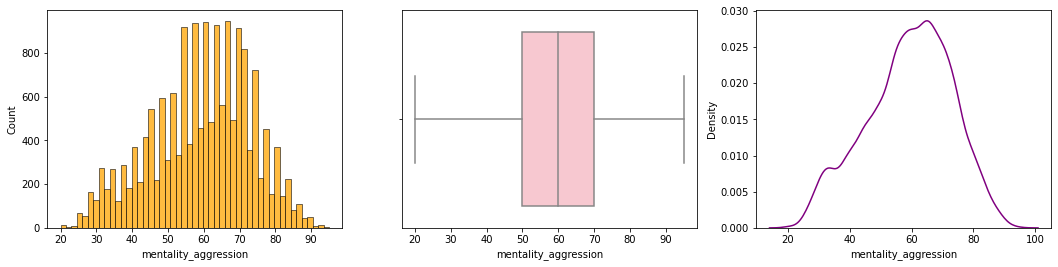

---
Pada kolom mentality_interceptions , skewness= -0.51


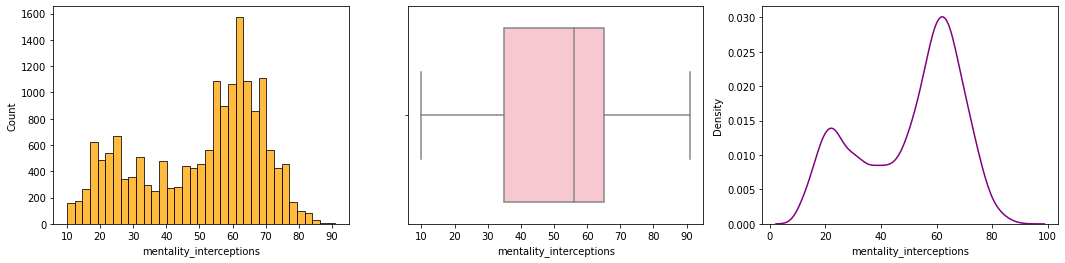

---
Pada kolom mentality_positioning , skewness= -0.58


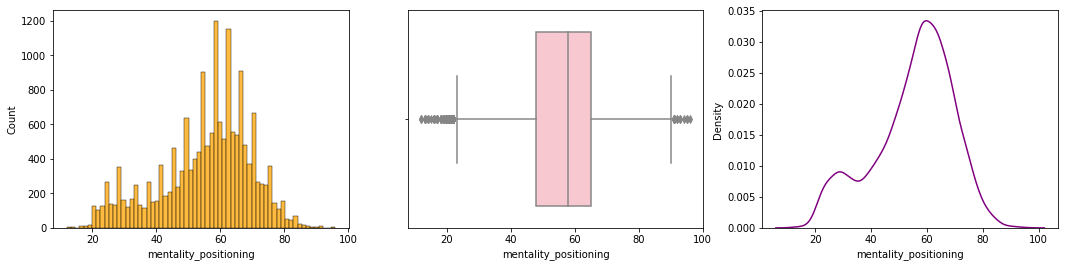

---
Pada kolom mentality_vision , skewness= -0.32


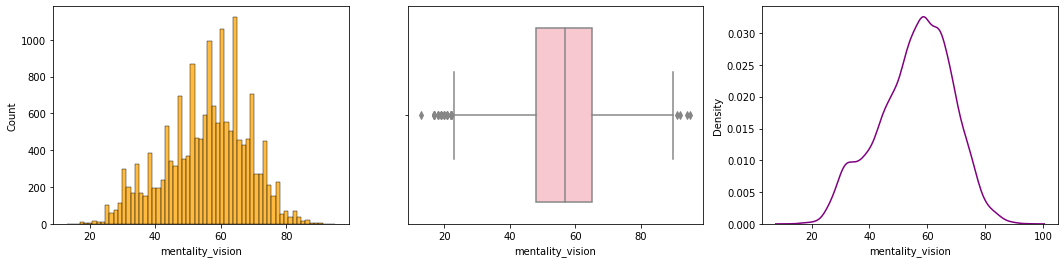

---
Pada kolom mentality_penalties , skewness= 0.16


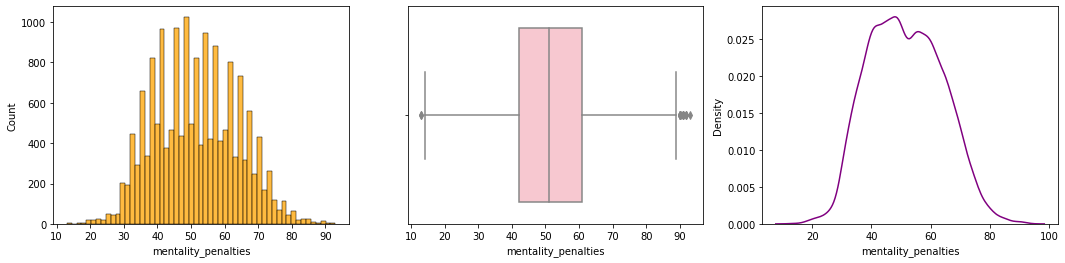

---
Pada kolom mentality_composure , skewness= -0.04


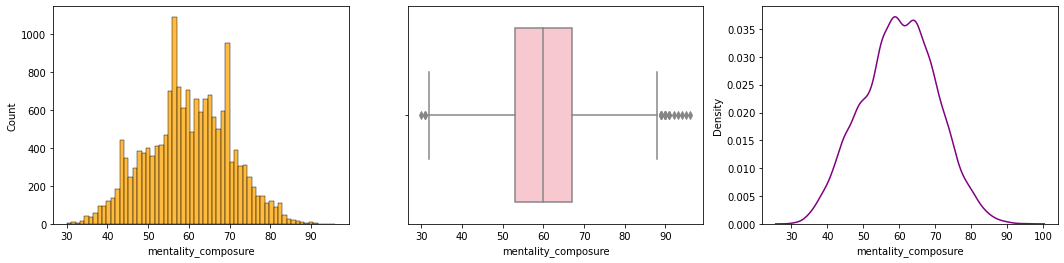

---
Pada kolom defending_marking_awareness , skewness= -0.46


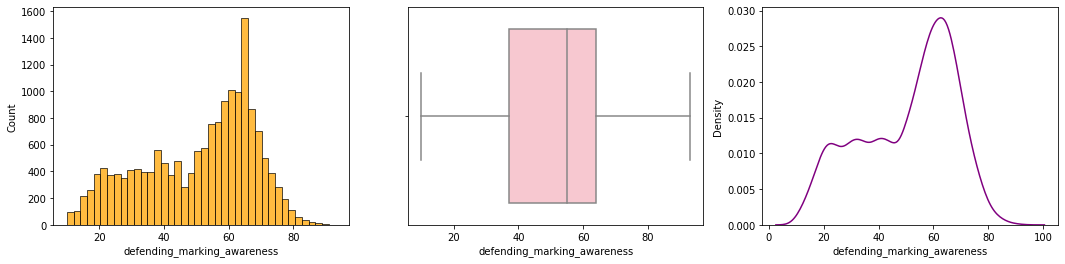

---
Pada kolom defending_standing_tackle , skewness= -0.59


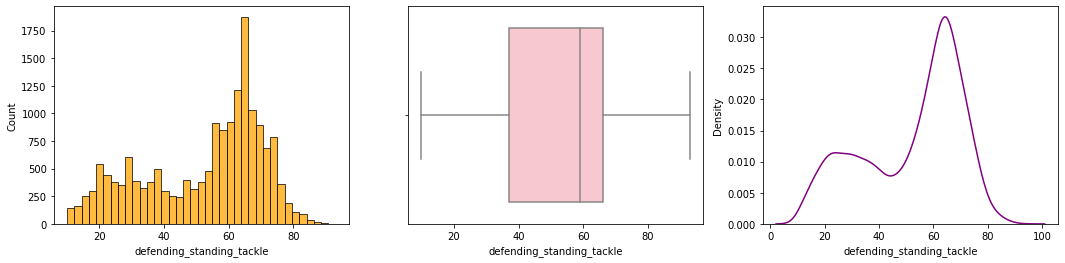

---
Pada kolom defending_sliding_tackle , skewness= -0.52


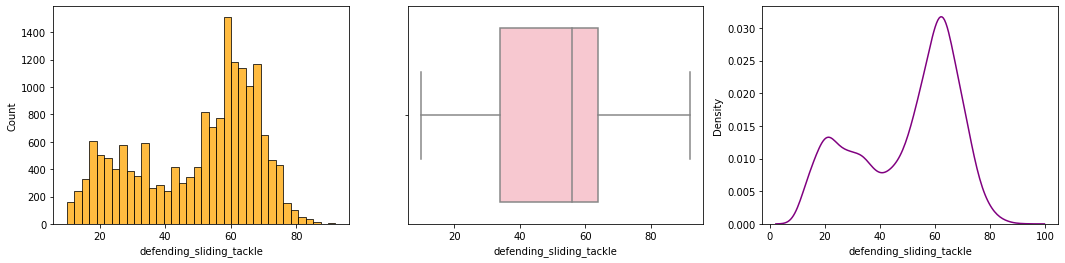

---
Pada kolom goalkeeping_diving , skewness= 0.07


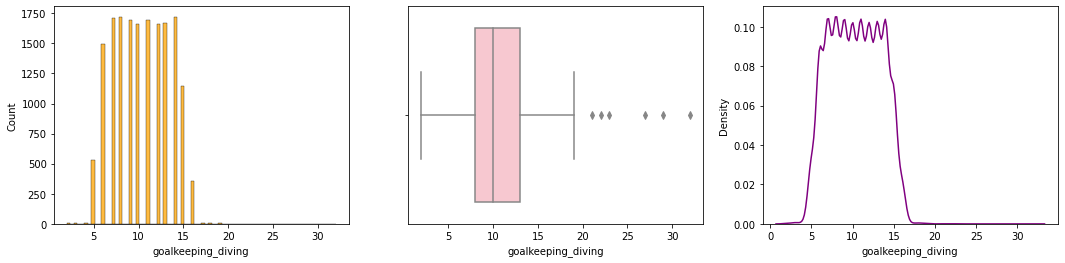

---
Pada kolom goalkeeping_handling , skewness= 0.07


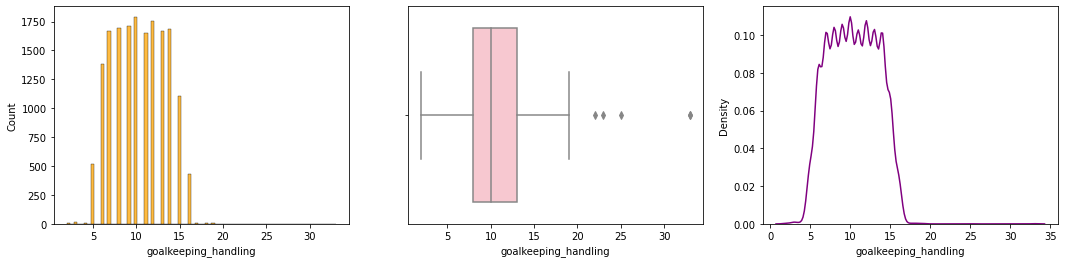

---
Pada kolom goalkeeping_kicking , skewness= 0.13


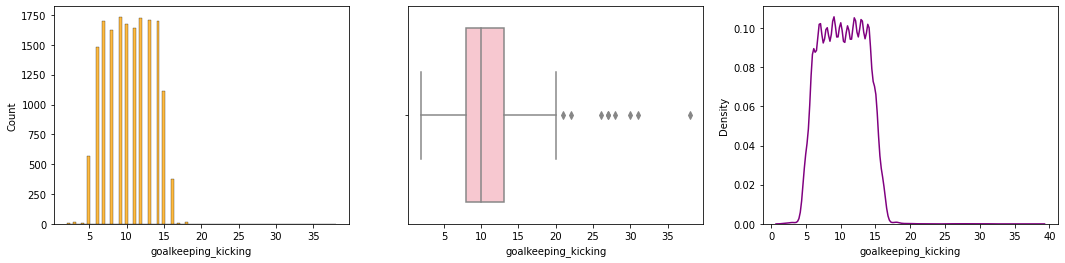

---
Pada kolom goalkeeping_positioning , skewness= 0.09


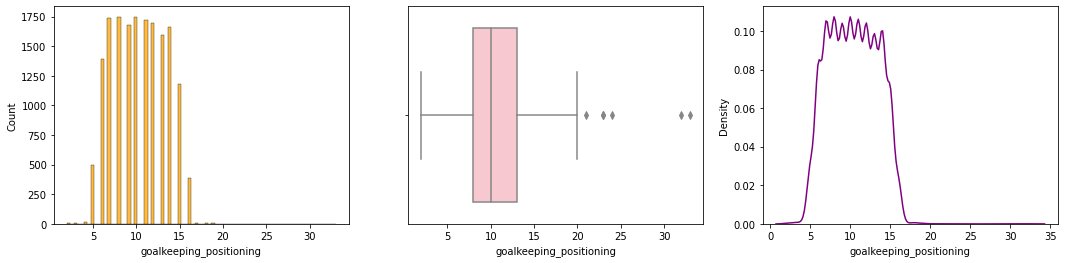

---
Pada kolom goalkeeping_reflexes , skewness= 0.14


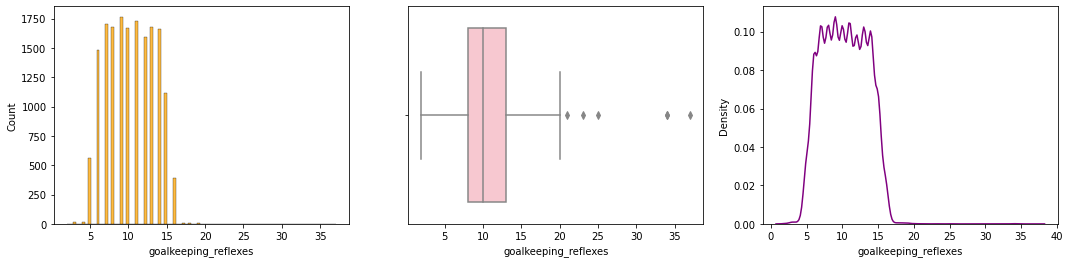

In [23]:
n = 0
for col in num_cols:
    fig, ax = plt.subplots(1,3, figsize=(18,4))
    sns.histplot(x=df[col], ax=ax[0], color='orange')
    sns.boxplot(x=df[col], ax=ax[1], color='pink')
    sns.kdeplot(x=df[col], ax=ax[2], color='purple')
    skewness = df[col].skew().round(2)
    print('---')
    print('Pada kolom', col, ', skewness=', skewness)
    n += 1
    plt.show()

- outliers pada kolom value_eur, wage_eur, dan release_clause_eur dianggap sbg outliers normal, sehingga tidak akan diberikan perlakuan apapun. Justru model regressi ini ditujukan untuk mencari hubungan antara label (value_eur) dengan kolom lainnya, kira-kira seberapa besar pengaruh dari tiap-tiap faktor tsb sehingga menyebabkan adanya segelintir pemain yg memiliki value_eur jauh lebih tinggi dibanding para pemain lainnya. Hipotesa awal adalah adanya hubungan eksponensial antara label dengan feature, dimana perubahan pada suatu feature di angka yg ekstrim tinggi atau ekstrim rendah, akan memberi pengaruh yang jauh lebih besar terhadap nilai label dibanding ketika perubahan itu terjadi di kisaran angka rata-rata.

- Pada kolom age, weight, dan height akan diberlakukan outliers handling berupa capping. Mereka yg berusia 40 atau 50 tahun seharusnya sudah tidak diperhitungkan lagi sebagai pemain yg kompetitif sehingga seharusnya tidak ada perbedaan yg signifikan antara value pemain berusia 40 tahun dan 50 tahun, meski ada selisih usia yg besar di sana. Begitupun dengan berat badan seorang pemain. Mereka yg memiliki bobot tubuh 49kg atau 59kg akan sama-sama dianggap sebagai pemain yg kurus dan lemah secara fisik di tingkat sepakbola profesional. Sehingga apabila ada selisih hingga 10kg, seharusnya tidak ada perbedaan value yg signifikan diantara mereka. Pada kolom height juga demikian, dimana pemain yg memiliki postur tinggi 190cm ataupun 200cm, sama-sama dianggap sebagai pemain berpostur besar(biasanya pada pemain belakang), sehingga seharusnya tidak memiliki perbedaan value yg signifikan meski memiliki selisih tinggi badan hingga 10cm.

- Outliers pada kolom lainnya yg merepresentasikan kemampuan teknik dan fisik dari seorang pemain akan dianggap sebagai outliers normal, sehingga tidak akan diberikan perlakuan apapun pada mereka.

---
# 5-Data Preprocessing

In [24]:
df.sample(5)

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2103,CB,74,81,8000000.0,6000.0,24,183,77,USA Major League Soccer,1.0,CB,2025.0,NaN,Right,2,2,1,Medium/High,Normal (170-185),13600000.0,NaN,Solid Player,63.0,34.0,51.0,64.0,75.0,79.0,38,28,75,68,35,63,31,35,46,65,66,60,59,73,65,50,72,80,79,28,79,75,39,45,42,72,73,79,71,6,8,12,7,13
9903,CB,65,73,1500000.0,3000.0,23,191,84,English League One,3.0,SUB,2023.0,NaN,Right,3,2,1,Medium/Medium,Lean (185+),2900000.0,NaN,NaN,58.0,34.0,48.0,55.0,64.0,76.0,38,33,64,58,39,55,33,35,54,60,57,59,41,60,41,41,69,77,80,26,68,64,36,42,43,63,64,65,64,6,14,13,12,10
4253,"CDM, CB, CM",70,70,550000.0,500.0,34,180,80,Paraguayan Primera División,1.0,RCB,2021.0,NaN,Right,3,2,1,Low/High,Normal (170-185),1200000.0,NaN,Dives Into Tackles (AI),59.0,48.0,65.0,58.0,68.0,68.0,66,45,46,72,43,53,48,54,73,64,58,59,57,74,55,54,65,58,82,49,44,74,53,54,44,56,60,78,70,9,8,8,9,12
13527,"RW, ST",61,74,775000.0,1000.0,19,179,67,Holland Eredivisie,1.0,SUB,2023.0,NaN,Left,3,3,1,Medium/Medium,Lean (170-185),1600000.0,NaN,NaN,81.0,57.0,52.0,63.0,26.0,50.0,51,57,51,52,60,62,65,48,46,62,82,81,79,54,70,58,60,51,50,57,45,17,58,56,52,52,26,25,20,15,6,14,12,9
1949,ST,74,79,6500000.0,36000.0,25,181,73,Italian Serie A,1.0,RF,2025.0,NaN,Right,4,4,1,High/Medium,Normal (170-185),11500000.0,NaN,Speed Dribbler (AI),73.0,72.0,70.0,75.0,32.0,62.0,67,75,74,73,67,73,73,64,63,77,72,74,82,73,75,74,77,65,71,65,32,21,78,72,69,75,42,20,15,8,14,9,14,13


> memisahkan data inference secara random

In [25]:
df_inf = df.sample(20, random_state=16).sort_index()

df_train_test = df.drop(df_inf.index)

df_inf

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
120,"CAM, CF, CM",84,92,94500000.0,130000.0,22,188,82,English Premier League,1.0,SUB,2025.0,CAM,Left,4,4,3,Medium/Medium,Unique,193700000.0,#Dribbler,"Finesse Shot, Playmaker (AI), Outside Foot Sho...",82.0,78.0,79.0,84.0,45.0,66.0,72,81,78,84,80,86,84,53,78,85,77,86,78,83,75,74,75,77,69,77,42,38,82,81,73,84,39,46,38,6,8,11,10,12
730,"RW, RM, ST",78,86,31000000.0,53000.0,23,185,76,English Premier League,1.0,RM,2024.0,NaN,Right,2,4,1,High/Medium,Lean (185+),65100000.0,#Speedster,Speed Dribbler (AI),94.0,76.0,67.0,80.0,22.0,67.0,68,75,44,69,76,82,78,55,59,79,94,94,78,76,74,82,48,73,71,78,53,17,73,68,58,78,25,16,21,14,13,7,6,9
886,"ST, CAM",77,82,16000000.0,27000.0,24,187,88,German 1. Bundesliga,1.0,SUB,2023.0,NaN,Right,4,3,2,Medium/High,Stocky (185+),28400000.0,NaN,"Injury Prone, Flair, Speed Dribbler (AI)",85.0,73.0,70.0,74.0,51.0,82.0,63,69,71,76,64,77,68,51,70,74,83,86,67,76,67,84,73,79,85,71,78,44,82,72,66,74,40,63,38,13,6,7,7,12
2238,CDM,73,73,2100000.0,24000.0,31,189,90,Saudi Abdul L. Jameel League,1.0,RDM,2022.0,NaN,Right,3,3,1,Medium/High,Stocky (185+),3600000.0,#Strength,Dives Into Tackles (AI),59.0,63.0,65.0,68.0,71.0,86.0,66,58,61,68,46,69,51,32,67,68,61,58,66,70,52,74,69,84,90,68,82,74,64,68,54,71,73,71,71,11,7,13,15,10
3143,"CF, RW",72,72,2400000.0,22000.0,28,181,69,Austrian Football Bundesliga,1.0,SUB,2024.0,NaN,Right,3,4,1,Medium/Medium,Lean (170-185),3600000.0,NaN,"Flair, Speed Dribbler (AI)",87.0,68.0,70.0,72.0,35.0,62.0,71,70,54,70,59,73,72,64,65,72,87,87,75,67,70,70,52,77,57,65,57,37,72,73,62,65,34,28,37,9,10,9,7,8
4841,"RB, RM",70,70,1400000.0,700.0,30,170,60,UAE Arabian Gulf League,1.0,RM,2024.0,NaN,Right,2,3,1,High/Low,Lean (170-),3000000.0,NaN,"Early Crosser, Outside Foot Shot",85.0,53.0,70.0,70.0,60.0,52.0,75,54,54,69,55,69,74,65,68,70,87,84,77,63,85,55,52,74,42,48,48,64,67,67,41,66,58,60,64,13,10,14,14,14
5870,CB,68,68,1000000.0,4000.0,30,194,89,Polish T-Mobile Ekstraklasa,1.0,RCB,2024.0,NaN,Right,3,2,1,Medium/Medium,Lean (185+),1400000.0,NaN,"Long Passer (AI), Power Header",40.0,45.0,58.0,56.0,69.0,64.0,38,35,71,67,24,52,45,59,71,65,36,44,50,65,32,70,80,41,76,54,58,70,30,57,41,66,68,70,67,14,9,9,13,12
6879,RB,67,67,875000.0,8000.0,30,184,75,Swiss Super League,1.0,SUB,2024.0,NaN,Right,2,3,1,Medium/Medium,Normal (170-185),1300000.0,NaN,Long Throw-in,70.0,51.0,60.0,63.0,64.0,69.0,66,46,61,65,56,62,60,46,62,61,68,71,72,62,70,59,71,72,69,51,64,62,63,45,45,69,63,67,65,12,6,5,9,10
7378,"LM, RM",67,68,1200000.0,3000.0,25,185,77,Polish T-Mobile Ekstraklasa,1.0,LM,2023.0,NaN,Right,3,3,1,High/Medium,Normal (185+),1700000.0,NaN,Technical Dribbler (AI),84.0,59.0,63.0,65.0,44.0,61.0,59,60,58,64,54,65,67,61,64,65,85,84,76,59,48,59,34,73,63,58,49,48,61,63,49,58,42,43,27,8,9,12,11,5
7563,CDM,67,69,1100000.0,3000.0,26,182,79,Polish T-Mobile Ekstraklasa,1.0,RDM,2021.0,NaN,Right,3,3,1,Medium/High,Lean (170-185),1600000.0,NaN,Team Player,65.0,49.0,61.0,66.0,63.0,71.0,54,44,52,67,29,66,32,57,63,64,66,64,72,66,60,58,59,82,71,58,58,66,5

In [26]:
df_inf[num_cols].describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,20.00000,20.000000,2.000000e+01,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,1.900000e+01,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,66.25000,71.050000,7.927750e+06,14640.000000,24.850000,183.00000,76.750000,1.450000,2022.900000,2.950000,2.65000,1.15000,1.658842e+07,70.450000,51.60000,56.80000,61.350000,50.750000,65.600000,52.500000,49.400000,57.100000,63.3000,46.600000,59.950000,51.150000,43.800000,56.700000,61.950000,69.200000,71.55000,65.25000,61.650000,63.100000,57.900000,63.650000,69.150000,67.550000,51.050000,56.200000,48.900000,55.650000,54.150000,48.700000,60.50000,50.550000,50.800000,48.000000,10.250000,9.100000,10.150000,9.600000,9.200000
std,8.25817,8.081656,2.165970e+07,30231.569418,3.645834,5.90272,7.919829,0.887041,1.252366,0.604805,0.74516,0.48936,4.558410e+07,13.056456,16.01118,11.56947,12.062447,16.757952,10.143185,16.465274,17.824879,10.140591,8.6639,17.682581,14.961266,18.035856,14.471751,12.144308,11.664047,14.214892,12.46247,11.52971,10.707966,11.742411,15.897368,13.468384,12.092951,12.525658,16.602077,12.821035,19.314298,16.871886,15.048256,11.397599,12.40331,15.912507,20.096085,19.431391,3.058637,2.468752,3.437793,2.998245,2.462348
min,49.00000,58.000000,1.000000e+05,500.000000,19.000000,170.00000,60.000000,1.000000,2021.000000,2.000000,2.00000,1.00000,1.900000e+05,40.000000,24.00000,41.00000,37.000000,19.000000,37.000000,23.000000,16.000000,31.000000,47.0000,24.000000,27.000000,24.000000,22.000000,36.000000,40.000000,36.000000,44.00000,34.00000,37.000000,32.000000,34.000000,34.000000,41.000000,37.000000,22.000000,29.000000,10.000000,27.000000,29.000000,33.000000,39.00000,22.000000,12.000000,13.000000,6.000000,6.000000,5.000000,6.000000,5.000000
25%,61.75000,66.750000,7.625000e+05,925.000000,22.750000,180.00000,73.500000,1.000000,2022.000000,3.000000,2.00000,1.00000,1.300000e+06,63.250000,39.50000,44.50000,54.750000,41.750000,61.750000,37.250000,34.750000,52.750000,58.0000,29.000000,52.000000,37.750000,31.750000,44.750000,54.000000,62.500000,64.00000,59.50000,56.500000,58.250000,46.000000,52.000000,65.000000,64.500000,41.500000,48.750000,37.750000,44.500000,41.750000,40.250000,53.75000,37.750000,39.250000,34.500000,8.000000,7.000000,7.000000,7.000000,7.750000
50%,66.50000,70.000000,1.050000e+06,3000.000000,23.500000,183.50000,78.000000,1.000000,2023.000000,3.000000,2.50000,1.00000,1.700000e+06,68.000000,52.00000,58.50000,63.000000,57.500000,66.500000,55.000000,49.500000,58.000000,64.5000,48.500000,60.500000,48.500000,44.500000,59.500000,63.000000,67.000000,68.50000,67.50000,61.500000,65.000000,59.000000,68.500000,72.500000,69.000000,52.500000,57.500000,56.500000,57.500000,56.000000,47.500000,62.50000,56.500000,60.000000,58.000000,10.000

> melakukan reset index

In [27]:
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

> mendefinisikan label dan feature

In [28]:
x = df_train_test.drop(['value_eur'], axis=1)
y = df_train_test['value_eur']

> melakukan pemisahan antara train & test

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=16)

In [30]:
x_train.sample(5).sort_index()

,player_positions,overall,potential,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
3852,LB,71,71,15000.0,21,174,71,Campeonato Brasileiro Série A,1.0,SUB,2024.0,NaN,Left,3,2,1,Medium/Medium,Normal (170-185),3800000.0,NaN,NaN,71.0,38.0,62.0,65.0,68.0,68.0,68,35,53,71,20,66,42,18,58,64,72,70,71,66,70,43,61,83,65,36,58,69,61,58,41,50,68,72,67,6,12,8,12,13
5109,CB,69,69,13000.0,29,191,71,English League Championship,2.0,RCB,2023.0,NaN,Right,3,2,1,Medium/Medium,Normal (185+),2300000.0,NaN,Injury Prone,61.0,39.0,48.0,46.0,69.0,70.0,27,37,71,64,31,32,30,31,52,57,60,62,55,69,44,43,82,59,77,42,63,73,38,45,45,59,69,64,69,16,13,12,10,11
12038,"RM, LM",63,63,1000.0,32,175,74,Polish T-Mobile Ekstraklasa,1.0,RM,2022.0,NaN,Left,3,3,1,High/High,Normal (170-185),506000.0,NaN,"Team Player, Technical Dribbler (AI)",66.0,62.0,59.0,65.0,29.0,51.0,58,65,36,61,55,67,67,49,55,62,64,67,68,63,70,63,48,51,59,52,32,24,62,58,68,61,26,31,31,7,12,10,5,12
12439,CB,62,68,700.0,23,179,78,German 3. Bundesliga,3.0,LCB,2022.0,NaN,Right,2,2,1,Medium/Medium,Normal (170-185),949000.0,NaN,NaN,71.0,45.0,42.0,49.0,61.0,66.0,26,48,62,58,29,43,28,24,52,47,71,71,70,53,65,50,85,60,70,43,58,59,23,28,42,56,60,63,64,12,7,12,9,9
15882,CB,56,65,500.0,19,186,77,French Ligue 2,2.0,RES,2025.0,NaN,Right,2,2,1,Medium/Medium,Normal (185+),585000.0,NaN,NaN,49.0,30.0,45.0,46.0,60.0,44.0,49,31,55,54,29,39,31,30,36,54,53,46,42,56,46,32,61,48,38,22,51,59,26,38,41,52,58,63,60,5,10,13,13,14


In [31]:
y_train.sample(5).sort_index()

1521    7000000.0
4340    1400000.0
5668    3100000.0
5867     525000.0
6877     625000.0
Name: value_eur, dtype: float64

> memisahkan kolom numerik dan kategorik

In [32]:
num_cols = x_train.select_dtypes(include=np.number).columns.tolist()
cat_cols = x_train.select_dtypes(include=object).columns.tolist()

# split on x_train
x_train_num = x_train[num_cols]
x_train_cat = x_train[cat_cols]

# split on x_test
x_test_num = x_test[num_cols]
x_test_cat = x_test[cat_cols]

# split on inference
df_inf_num = df_inf[num_cols]
df_inf_cat = df_inf[cat_cols]

x_train_num.sample(5).sort_index()

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
409,80,85,95000.0,24,175,64,1.0,2024.0,3,3,2,56800000.0,73.0,65.0,80.0,80.0,77.0,69.0,82,58,70,82,61,80,81,76,78,82,75,71,78,78,78,77,72,76,63,71,74,77,75,78,59,80,78,79,76,15,11,13,11,11
2283,73,73,30000.0,32,183,89,1.0,2024.0,3,3,1,4100000.0,73.0,68.0,68.0,73.0,71.0,82.0,58,67,62,74,54,74,61,46,73,76,69,76,63,73,67,78,65,85,83,67,79,71,69,69,62,69,68,76,72,9,11,8,12,8
4355,70,70,8000.0,29,180,70,1.0,2025.0,3,2,1,2200000.0,50.0,42.0,53.0,62.0,70.0,77.0,40,41,70,64,35,62,24,42,60,64,53,47,64,63,52,49,79,76,80,43,70,70,27,52,31,55,69,72,71,8,16,14,8,11
12921,62,66,1000.0,24,182,77,1.0,2022.0,2,2,1,748000.0,68.0,34.0,52.0,52.0,61.0,66.0,40,29,61,61,28,42,28,34,56,58,66,70,62,59,67,41,69,61,73,35,55,62,37,55,42,60,59,62,58,11,5,9,12,6
14097,60,79,1000.0,19,184,72,1.0,2021.0,2,3,1,1500000.0,56.0,62.0,59.0,63.0,39.0,45.0,55,57,42,65,54,65,49,40,65,67,60,52,55,58,68,71,39,55,47,68,29,40,50,55,65,45,35,44,27,6,14,13,12,7


> Mengecek jenis distribusi pada kolom yg akan diberlakukan imputasi

---
Pada kolom age , skewness= 0.41


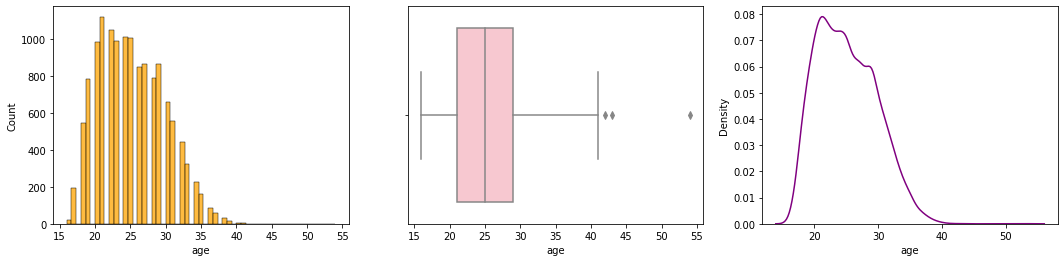

---
Pada kolom height_cm , skewness= -0.03


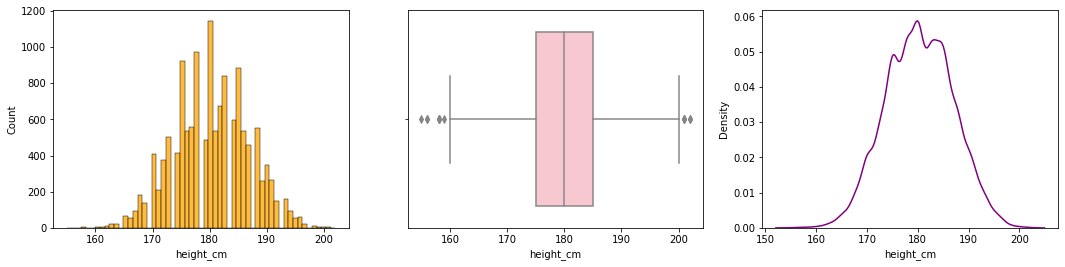

---
Pada kolom weight_kg , skewness= 0.24


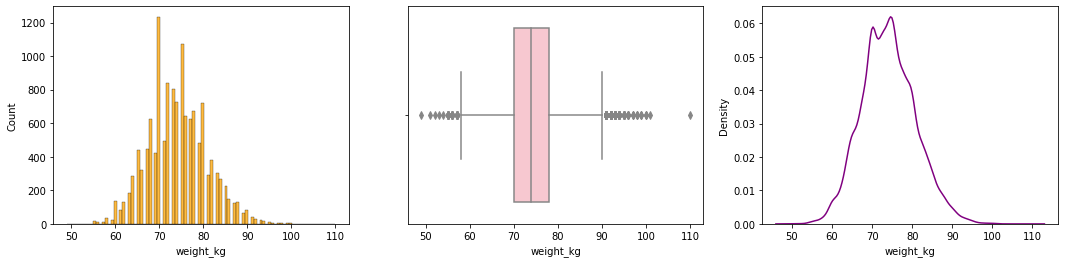

In [33]:
skew_val = pd.DataFrame(['age','height_cm','weight_kg'])
skew_val['Skewness'] = np.float64

n = 0
for col in num_cols:
    if col == 'age' or col == 'height_cm' or col == 'weight_kg':
        fig, ax = plt.subplots(1,3, figsize=(18,4))
        sns.histplot(x=x_train_num[col], ax=ax[0], color='orange')
        sns.boxplot(x=x_train_num[col], ax=ax[1], color='pink')
        sns.kdeplot(x=x_train_num[col], ax=ax[2], color='purple')
        skewness = x_train_num[col].skew().round(2)
        print('---')
        print('Pada kolom', col, ', skewness=', skewness)
        skew_val.Skewness.iloc[n]=skewness
        n += 1
        plt.show()
    else:
        continue

> Outliers handling pada kolom age, weight, dan height

In [34]:
skew_val

,0,Skewness
0,age,0.41
1,height_cm,-0.03
2,weight_kg,0.24


In [35]:
skew_val['Imputation'] = 'unknown'

n = 0
for s in skew_val.Skewness:
    if skew_val.Skewness.iloc[n]<=-0.5 or skew_val.Skewness.iloc[n]>=0.5 :
        skew_val.Imputation.iloc[n] = 'IQR'
        n += 1
    else:
        skew_val.Imputation.iloc[n] = 'Gaussian'
        n += 1

skew_val

,0,Skewness,Imputation
0,age,0.41,Gaussian
1,height_cm,-0.03,Gaussian
2,weight_kg,0.24,Gaussian


In [36]:
# impute_iqr = skew_val.query('Imputation=="IQR"')[0].tolist()
impute_gaus = skew_val.query('Imputation=="Gaussian"')[0].tolist()

# winsor_iqr = Winsorizer(capping_method='iqr',
#                     tail='both',
#                     fold=1.5,
#                     variables=impute_iqr,
#                     missing_values='ignore')

winsor_gaus = Winsorizer(capping_method='gaussian',
                    tail='both',
                    fold=3,
                    variables=impute_gaus,
                    missing_values='ignore')

# winsor_iqr.fit(x_train_num)
winsor_gaus.fit(x_train_num)

# train
# x_train_num_w = winsor_iqr.transform(x_train_num)
x_train_num_w = winsor_gaus.transform(x_train_num)

# test
# x_test_num_w = winsor_iqr.transform(x_test_num)
x_test_num_w = winsor_gaus.transform(x_test_num)

# inference
# df_inf_num_w = winsor_iqr.transform(df_inf_num)
df_inf_num_w = winsor_gaus.transform(df_inf_num)

In [37]:
x_train_num.describe()

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,13669.000000,13669.000000,13626.000000,13669.000000,13669.000000,13669.000000,13626.000000,13626.000000,13669.000000,13669.000000,13669.000000,1.279800e+04,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.00000,13669.000000,13669.000000,13669.00000
mean,65.904675,71.235935,9350.150448,25.078938,180.352037,74.088960,1.354396,2022.776310,3.003146,2.522423,1.096496,5.575315e+06,68.224303,52.373619,57.260590,62.566976,51.572610,64.742776,53.996415,50.295998,56.454240,62.746068,46.424025,60.980247,51.375960,45.801302,56.315312,63.344722,68.212305,68.213915,66.620967,61.832029,66.866852,59.186480,65.800351,67.204770,65.589436,51.041115,59.165045,50.381154,55.377497,55.850684,51.587095,60.025240,50.576121,52.171849,49.775770,10.341722,10.39820,10.351379,10.401346,10.30507
std,6.814577,6.034265,20030.280989,4.652356,6.566960,6.704679,0.747822,1.218457,0.653935,0.637363,0.378076,1.514643e+07,10.941976,14.095594,10.121105,9.673443,16.225234,9.836361,13.591028,16.288172,11.577577,9.369389,14.571181,11.876303,14.809805,14.786552,12.009681,9.593736,11.427034,11.230643,12.219146,8.776758,12.119146,13.215896,11.814320,11.283941,12.738609,15.748938,13.884062,18.464874,14.299552,12.631180,12.457124,10.298516,17.429733,18.479832,18.391655,3.009968,3.00971,3.040447,3.002051,3.04728
min,47.000000,49.000000,500.000000,16.000000,155.000000,49.000000,1.000000,2021.000000,1.000000,2.000000,1.000000,2.300000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,15.000000,10.000000,17.000000,23.000000,10.000000,16.000000,12.000000,10.000000,20.000000,24.000000,27.000000,27.000000,25.000000,29.000000,27.000000,20.000000,29.000000,24.000000,19.000000,11.000000,20.000000,10.000000,12.000000,13.000000,13.000000,30.000000,10.000000,10.000000,10.000000,2.000000,2.00000,2.000000,2.000000,2.00000
25%,62.000000,67.000000,1000.000000,21.000000,175.000000,70.000000,1.000000,2022.000000,3.000000,2.000000,1.000000,8.750000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,58.000000,45.000000,37.000000,48.000000,57.000000,34.000000,55.000000,40.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,58.000000,60.000000,58.000000,39.000000,50.000000,34.000000,47.000000,48.000000,42.000000,53.000000,36.000000,36.000000,33.000000,8.000000,8.00000,8.000000,8.000000,8.00000
50%,66.000000,71.000000,3000.000000,25.000000,180.000000,74.000000,1.000000,2023.000000,3.000000,2.000000,1.000000,1.700000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,56.000000,53.000000,57.000000,63.000000,46.000000,63.000000,52.000000,43.000000,58.000000,64.000000,69.000000,69.000000,68.000000,62.000000,68.000000,61.000000,66.000000,68.000

In [38]:
x_train_num_w.describe()

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,13669.000000,13669.000000,13626.000000,13669.000000,13669.000000,13669.000000,13626.000000,13626.000000,13669.000000,13669.000000,13669.000000,1.279800e+04,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.000000,13669.00000,13669.000000,13669.000000,13669.00000
mean,65.904675,71.235935,9350.150448,25.076555,180.353869,74.082844,1.354396,2022.776310,3.003146,2.522423,1.096496,5.575315e+06,68.224303,52.373619,57.260590,62.566976,51.572610,64.742776,53.996415,50.295998,56.454240,62.746068,46.424025,60.980247,51.375960,45.801302,56.315312,63.344722,68.212305,68.213915,66.620967,61.832029,66.866852,59.186480,65.800351,67.204770,65.589436,51.041115,59.165045,50.381154,55.377497,55.850684,51.587095,60.025240,50.576121,52.171849,49.775770,10.341722,10.39820,10.351379,10.401346,10.30507
std,6.814577,6.034265,20030.280989,4.643132,6.557838,6.678228,0.747822,1.218457,0.653935,0.637363,0.378076,1.514643e+07,10.941976,14.095594,10.121105,9.673443,16.225234,9.836361,13.591028,16.288172,11.577577,9.369389,14.571181,11.876303,14.809805,14.786552,12.009681,9.593736,11.427034,11.230643,12.219146,8.776758,12.119146,13.215896,11.814320,11.283941,12.738609,15.748938,13.884062,18.464874,14.299552,12.631180,12.457124,10.298516,17.429733,18.479832,18.391655,3.009968,3.00971,3.040447,3.002051,3.04728
min,47.000000,49.000000,500.000000,16.000000,160.651158,53.974923,1.000000,2021.000000,1.000000,2.000000,1.000000,2.300000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,15.000000,10.000000,17.000000,23.000000,10.000000,16.000000,12.000000,10.000000,20.000000,24.000000,27.000000,27.000000,25.000000,29.000000,27.000000,20.000000,29.000000,24.000000,19.000000,11.000000,20.000000,10.000000,12.000000,13.000000,13.000000,30.000000,10.000000,10.000000,10.000000,2.000000,2.00000,2.000000,2.000000,2.00000
25%,62.000000,67.000000,1000.000000,21.000000,175.000000,70.000000,1.000000,2022.000000,3.000000,2.000000,1.000000,8.750000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,58.000000,45.000000,37.000000,48.000000,57.000000,34.000000,55.000000,40.000000,34.000000,49.000000,58.000000,62.000000,62.000000,59.000000,56.000000,60.000000,51.000000,58.000000,60.000000,58.000000,39.000000,50.000000,34.000000,47.000000,48.000000,42.000000,53.000000,36.000000,36.000000,33.000000,8.000000,8.00000,8.000000,8.000000,8.00000
50%,66.000000,71.000000,3000.000000,25.000000,180.000000,74.000000,1.000000,2023.000000,3.000000,2.000000,1.000000,1.700000e+06,69.000000,54.000000,58.000000,64.000000,56.000000,66.000000,56.000000,53.000000,57.000000,63.000000,46.000000,63.000000,52.000000,43.000000,58.000000,64.000000,69.000000,69.000000,68.000000,62.000000,68.000000,61.000000,66.000000,68.000

> Missing Value Handling pada Kolom Numerik

- Ternyata nilai NaN pada kolom value_eur merujuk pada pemain dengan kondisi tanpa klub dan/atau pemain yg sudah berusia sangat tua. Dengan kata lain, nilai NaN pada value_eur dan wage_eur bisa diganti dan harus diganti dengan angka nol.

- Nilai NaN pada kolom league_level menandakan pemain tsb tidak memiliki klub profesional, sehingga akan diganti dengan angka 6. (angka 5 adalah nilai maksimal pada dataset yg menandakan pemain bermain di kub yg berada pada kasta liga terendah, sedangkan angka 1 menandakan kasta liga tertinggi)

- Nilai NaN pada kolom club_contract_valid_until akan diganti dengan angka 2020 (artinya kontrak sang pemain telah berakhir setidaknya tahun lalu, karena tahun terkecil yg bernilai tidak NaN adalah 2021)

- Nilai NaN pada kolom release_clause_eur akan diganti dengan angka nol karena bermakna pemain berstatus tanpa klub dan tidak memiliki nilai jual berdasarkan kontrak.

In [39]:
x_train_num_w.isna().sum()

overall                          0
potential                        0
wage_eur                        43
age                              0
height_cm                        0
weight_kg                        0
league_level                    43
club_contract_valid_until       43
weak_foot                        0
skill_moves                      0
international_reputation         0
release_clause_eur             871
pace                             0
shooting                         0
passing                          0
dribbling                        0
defending                        0
physic                           0
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleratio

In [40]:
x_train_num_w.wage_eur.fillna(0, inplace=True)
x_train_num_w.league_level.fillna(6, inplace=True)
x_train_num_w.club_contract_valid_until.fillna(2020, inplace=True)
x_train_num_w.release_clause_eur.fillna(0, inplace=True)

x_test_num_w.wage_eur.fillna(0, inplace=True)
x_test_num_w.league_level.fillna(6, inplace=True)
x_test_num_w.club_contract_valid_until.fillna(2020, inplace=True)
x_test_num_w.release_clause_eur.fillna(0, inplace=True)

df_inf_num_w.wage_eur.fillna(0, inplace=True)
df_inf_num_w.league_level.fillna(6, inplace=True)
df_inf_num_w.club_contract_valid_until.fillna(2020, inplace=True)
df_inf_num_w.release_clause_eur.fillna(0, inplace=True)

x_train_num_w.isna().sum()

overall                        0
potential                      0
wage_eur                       0
age                            0
height_cm                      0
weight_kg                      0
league_level                   0
club_contract_valid_until      0
weak_foot                      0
skill_moves                    0
international_reputation       0
release_clause_eur             0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_a

> Feature Engineering pada kolom kategorik

- Kolom player_positions menunjukkan berapa banyak jumlah posisi yg bisa dimainkan oleh seorang pemain, menandakan tingkat utilitas dan fleksibilitas seorang pemain terhadap taktik yg berbeda. Semakin banyak posisi yg bisa dimainkan oleh seorang pemain, seharusnya juga berdampak pada semakin tingginya value dari pemain tsb.

- Kolom player_tags menunjukkan karakteristik seorang pemain. Mereka yg memiliki tag khusus adalah pemain yg unik menurut user, dan biasanya lebih baik dibanding pemain biasa yg tidak memiliki tags apapun. NaN pada kolom ini akan diganti dengan angka nol pada feature engineering, menandakan bahwa sang pemain tidak memiliki tags apapun.

- Kolom player_traits juga menunjukkan karakteristik seorang pemain, namun kali ini adalah berdasarkan source code dari game itu sendiri. Mereka yg memiliki banyak player_traits biasanya lebih kaya akan skill dan kemampuan, sehingga seharusnya memiliki value yg lebih tinggi. NaN pada kolom ini akan diganti dengan angka nol pada feature engineering, menandakan bahwa sang pemain tidak memiliki traits apapun.

- Pada ketiga kolom tsb akan diberlakukan Feature Engineering, dengan mengubahnya menjadi data numerik berdasarkan jumlah data yg terkandung pada tiap cell. Jika pemain hanya memiliki 1 posisi bermain (apapun posisinya), maka data tsb akan diubah menjadi angka 1. Jika ia memiliki 2 player_tags (apapun tags nya), maka data tsb akan diubah menjadi angka 2. Jika pemain tsb memiliki 3 player_traits, maka akan diubah menjadi angka 3, dan seterusnya. Namun jika datanya bernilai NaN, maka akan diganti menjadi angka nol.

In [41]:
x_train_cat.sample(5, random_state=10)

,player_positions,league_name,club_position,nation_position,preferred_foot,work_rate,body_type,player_tags,player_traits
5090,"CM, CDM, CAM",Mexican Liga MX,SUB,NaN,Right,High/Medium,Normal (170-),NaN,"Long Shot Taker (AI), Outside Foot Shot"
70,CF,English Premier League,CF,NaN,Right,High/High,Unique,"#Dribbler, #Engine","Flair, Playmaker (AI), Technical Dribbler (AI)"
2579,ST,Campeonato Brasileiro Série A,ST,NaN,Right,Medium/Medium,Normal (185+),NaN,Dives Into Tackles (AI)
15118,LM,Turkish Süper Lig,SUB,NaN,Right,Medium/Low,Lean (170-185),NaN,NaN
6118,"LB, LM",Belgian Jupiler Pro League,LM,NaN,Left,High/Medium,Lean (170-185),NaN,NaN


In [42]:
# test code
p = 'Long Throw-in, Long Passer (AI)'
q = p.split(sep=',', maxsplit=-1)

q, len(q)

(['Long Throw-in', ' Long Passer (AI)'], 2)

In [43]:
# membuat kolom baru untuk menampung nilai kategorik yg akan dijadikan numerik
x_train_num_w['position_sum'] = np.float64
x_train_num_w['tags_sum'] = np.float64
x_train_num_w['traits_sum'] = np.float64

x_train_num_w.head(5)

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
5679,69,75,6000.0,24.0,174.0,69.0,2.0,2024.0,2,3,1,4000000.0,80.0,61.0,61.0,75.0,35.0,46.0,59,59,38,61,63,76,68,62,58,75,78,81,80,61,80,65,57,70,35,61,43,27,60,64,52,62,34,36,49,7,7,13,13,13,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
14555,59,70,750.0,20.0,177.0,74.0,3.0,2022.0,4,2,1,825000.0,66.0,48.0,54.0,66.0,36.0,50.0,42,43,35,58,55,66,63,35,55,64,65,66,73,63,73,58,53,39,57,49,45,21,47,60,48,50,39,40,44,6,11,6,14,12,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
3199,72,72,24000.0,29.0,186.0,79.0,1.0,2024.0,3,2,1,3800000.0,64.0,58.0,60.0,63.0,71.0,76.0,47,42,72,73,50,60,60,48,67,66,69,60,68,64,56,79,81,75,75,76,80,65,55,50,50,72,70,75,77,8,13,9,9,10,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
204,82,82,59000.0,30.0,185.0,76.0,1.0,2024.0,3,3,3,43400000.0,66.0,68.0,71.0,73.0,82.0,83.0,68,60,75,78,64,71,61,48,75,76,64,68,61,82,73,76,80,92,77,77,85,84,67,69,80,81,82,84,81,14,15,7,12,12,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
8761,66,77,5000.0,20.0,173.0,68.0,1.0,2023.0,2,3,1,4000000.0,67.0,47.0,53.0,69.0,62.0,58.0,68,48,50,56,37,70,29,30,44,69,71,64,68,62,79,46,66,63,54,46,62,61,58,53,38,56,57,69,66,14,14,13,14,9,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>


In [44]:
# membuat salinan data train
x_train_num_w_f = x_train_num_w.copy()

x_train_num_w_f.head(7)

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
5679,69,75,6000.0,24.0,174.0,69.0,2.0,2024.0,2,3,1,4000000.0,80.0,61.0,61.0,75.0,35.0,46.0,59,59,38,61,63,76,68,62,58,75,78,81,80,61,80,65,57,70,35,61,43,27,60,64,52,62,34,36,49,7,7,13,13,13,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
14555,59,70,750.0,20.0,177.0,74.0,3.0,2022.0,4,2,1,825000.0,66.0,48.0,54.0,66.0,36.0,50.0,42,43,35,58,55,66,63,35,55,64,65,66,73,63,73,58,53,39,57,49,45,21,47,60,48,50,39,40,44,6,11,6,14,12,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
3199,72,72,24000.0,29.0,186.0,79.0,1.0,2024.0,3,2,1,3800000.0,64.0,58.0,60.0,63.0,71.0,76.0,47,42,72,73,50,60,60,48,67,66,69,60,68,64,56,79,81,75,75,76,80,65,55,50,50,72,70,75,77,8,13,9,9,10,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
204,82,82,59000.0,30.0,185.0,76.0,1.0,2024.0,3,3,3,43400000.0,66.0,68.0,71.0,73.0,82.0,83.0,68,60,75,78,64,71,61,48,75,76,64,68,61,82,73,76,80,92,77,77,85,84,67,69,80,81,82,84,81,14,15,7,12,12,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
8761,66,77,5000.0,20.0,173.0,68.0,1.0,2023.0,2,3,1,4000000.0,67.0,47.0,53.0,69.0,62.0,58.0,68,48,50,56,37,70,29,30,44,69,71,64,68,62,79,46,66,63,54,46,62,61,58,53,38,56,57,69,66,14,14,13,14,9,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
3091,72,77,21000.0,24.0,177.0,76.0,2.0,2024.0,3,3,1,6800000.0,77.0,72.0,71.0,75.0,35.0,64.0,70,70,65,72,72,76,72,71,68,75,77,77,76,74,73,75,73,68,66,71,52,25,72,72,75,59,34,34,34,15,7,7,13,7,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>
13678,61,61,3000.0,27.0,175.0,70.0,1.0,2023.0,3,2,1,438000.0,75.0,59.0,52.0,61.0,28.0,56.0,53,61,54,58,50,60,41,40,46,61,77,74,70,55,76,62,67,62,58,55,43,26,58,53,58,50,25,25,23,13,9,7,9,8,<class 'numpy.float64'>,<class 'numpy.float64'>,<class 'numpy.float64'>


In [45]:
# menyimpan data sementara tiap kolom pada variabel terpisah berbentuk series
indeks_train = x_train_cat.index
position_train = x_train_cat.player_positions.squeeze()
tags_train = x_train_cat.player_tags.squeeze()
tags_train.fillna(-9999, inplace=True)
traits_train = x_train_cat.player_traits.squeeze()
traits_train.fillna(-9999, inplace=True)

# memulai feature engineering
for i in indeks_train:
    
    x_train_num_w_f.position_sum.loc[i] = len(position_train.loc[i].split(sep=',', maxsplit=-1))
    
    if tags_train.loc[i] != -9999:
        x_train_num_w_f.tags_sum.loc[i] = len(tags_train.loc[i].split(sep=',', maxsplit=-1))
    else:
        x_train_num_w_f.tags_sum.loc[i] = 0

    if traits_train.loc[i] != -9999:
        x_train_num_w_f.traits_sum.loc[i] = len(traits_train.loc[i].split(sep=',', maxsplit=-1))
    else:
        x_train_num_w_f.traits_sum.loc[i] = 0

x_train_num_w_f.head(7)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
5679,69,75,6000.0,24.0,174.0,69.0,2.0,2024.0,2,3,1,4000000.0,80.0,61.0,61.0,75.0,35.0,46.0,59,59,38,61,63,76,68,62,58,75,78,81,80,61,80,65,57,70,35,61,43,27,60,64,52,62,34,36,49,7,7,13,13,13,1,0,2
14555,59,70,750.0,20.0,177.0,74.0,3.0,2022.0,4,2,1,825000.0,66.0,48.0,54.0,66.0,36.0,50.0,42,43,35,58,55,66,63,35,55,64,65,66,73,63,73,58,53,39,57,49,45,21,47,60,48,50,39,40,44,6,11,6,14,12,2,0,0
3199,72,72,24000.0,29.0,186.0,79.0,1.0,2024.0,3,2,1,3800000.0,64.0,58.0,60.0,63.0,71.0,76.0,47,42,72,73,50,60,60,48,67,66,69,60,68,64,56,79,81,75,75,76,80,65,55,50,50,72,70,75,77,8,13,9,9,10,2,0,1
204,82,82,59000.0,30.0,185.0,76.0,1.0,2024.0,3,3,3,43400000.0,66.0,68.0,71.0,73.0,82.0,83.0,68,60,75,78,64,71,61,48,75,76,64,68,61,82,73,76,80,92,77,77,85,84,67,69,80,81,82,84,81,14,15,7,12,12,2,0,1
8761,66,77,5000.0,20.0,173.0,68.0,1.0,2023.0,2,3,1,4000000.0,67.0,47.0,53.0,69.0,62.0,58.0,68,48,50,56,37,70,29,30,44,69,71,64,68,62,79,46,66,63,54,46,62,61,58,53,38,56,57,69,66,14,14,13,14,9,2,0,0
3091,72,77,21000.0,24.0,177.0,76.0,2.0,2024.0,3,3,1,6800000.0,77.0,72.0,71.0,75.0,35.0,64.0,70,70,65,72,72,76,72,71,68,75,77,77,76,74,73,75,73,68,66,71,52,25,72,72,75,59,34,34,34,15,7,7,13,7,2,0,3
13678,61,61,3000.0,27.0,175.0,70.0,1.0,2023.0,3,2,1,438000.0,75.0,59.0,52.0,61.0,28.0,56.0,53,61,54,58,50,60,41,40,46,61,77,74,70,55,76,62,67,62,58,55,43,26,58,53,58,50,25,25,23,13,9,7,9,8,2,0,0


In [46]:
x_train_cat.head(7)

,player_positions,league_name,club_position,nation_position,preferred_foot,work_rate,body_type,player_tags,player_traits
5679,LM,Spanish Segunda División,SUB,NaN,Right,High/Medium,Normal (170-185),-9999,"Flair, Technical Dribbler (AI)"
14555,"CAM, RM",German 3. Bundesliga,SUB,NaN,Right,Medium/Medium,Normal (170-185),-9999,-9999
3199,"CB, CDM",Campeonato Brasileiro Série A,RCB,NaN,Right,Medium/Medium,Lean (185+),-9999,Dives Into Tackles (AI)
204,"CDM, CM",Italian Serie A,RCM,SUB,Right,Medium/High,Normal (185+),-9999,Solid Player
8761,"LWB, LB",French Ligue 1,SUB,NaN,Left,High/Medium,Normal (170-185),-9999,-9999
3091,"ST, LW",Italian Serie B,ST,NaN,Right,High/Low,Normal (170-185),-9999,"Finesse Shot, Long Shot Taker (AI), Speed Drib..."
13678,"RW, ST",Danish Superliga,SUB,NaN,Left,Medium/Medium,Normal (170-185),-9999,-9999


In [47]:
# menghapus kolom player_positions, player_tags, dan player_traits pada kolom kategorik,
# karena ketiga kolom tsb sudah dikonversi menjadi bentuk numerik via Feature Engineering.

x_train_cat_f = x_train_cat.drop(['player_positions', 'player_tags', 'player_traits'], axis=1)

x_train_cat_f.head(7)

,league_name,club_position,nation_position,preferred_foot,work_rate,body_type
5679,Spanish Segunda División,SUB,NaN,Right,High/Medium,Normal (170-185)
14555,German 3. Bundesliga,SUB,NaN,Right,Medium/Medium,Normal (170-185)
3199,Campeonato Brasileiro Série A,RCB,NaN,Right,Medium/Medium,Lean (185+)
204,Italian Serie A,RCM,SUB,Right,Medium/High,Normal (185+)
8761,French Ligue 1,SUB,NaN,Left,High/Medium,Normal (170-185)
3091,Italian Serie B,ST,NaN,Right,High/Low,Normal (170-185)
13678,Danish Superliga,SUB,NaN,Left,Medium/Medium,Normal (170-185)


> Feature Engineering pada set data Test

In [48]:
# membuat kolom baru untuk menampung nilai kategorik yg akan dijadikan numerik
x_test_num_w['position_sum'] = np.float64
x_test_num_w['tags_sum'] = np.float64
x_test_num_w['traits_sum'] = np.float64

# membuat salinan data test
x_test_num_w_f = x_test_num_w.copy()

# menyimpan data sementara tiap kolom pada variabel terpisah berbentuk series
indeks_test = x_test_cat.index
position_test = x_test_cat.player_positions.squeeze()
tags_test = x_test_cat.player_tags.squeeze()
tags_test.fillna(-9999, inplace=True)
traits_test = x_test_cat.player_traits.squeeze()
traits_test.fillna(-9999, inplace=True)

# memulai feature engineering
for i in indeks_test:
    
    x_test_num_w_f.position_sum.loc[i] = len(position_test.loc[i].split(sep=',', maxsplit=-1))
    
    if tags_test.loc[i] != -9999:
        x_test_num_w_f.tags_sum.loc[i] = len(tags_test.loc[i].split(sep=',', maxsplit=-1))
    else:
        x_test_num_w_f.tags_sum.loc[i] = 0

    if traits_test.loc[i] != -9999:
        x_test_num_w_f.traits_sum.loc[i] = len(traits_test.loc[i].split(sep=',', maxsplit=-1))
    else:
        x_test_num_w_f.traits_sum.loc[i] = 0

# menghapus kolom player_positions, player_tags, dan player_traits pada kolom kategorik,
# karena ketiga kolom tsb sudah dikonversi menjadi bentuk numerik via Feature Engineering.
x_test_cat_f = x_test_cat.drop(['player_positions', 'player_tags', 'player_traits'], axis=1)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
x_test_num_w_f.head(7)

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
11291,63,63,500.0,28.0,174.0,70.0,1.0,2021.0,3,3,1,1000000.0,87.0,63.0,58.0,67.0,58.0,73.0,57,60,56,57,39,70,61,69,55,63,83,91,73,49,80,74,75,80,76,67,54,53,61,57,58,65,57,63,60,7,6,11,7,8,2,0,0
9864,65,68,1000.0,24.0,177.0,65.0,1.0,2022.0,3,3,1,1300000.0,77.0,62.0,61.0,65.0,36.0,58.0,64,59,37,61,53,65,59,55,57,63,70,82,73,57,70,67,66,70,61,67,34,36,64,63,55,56,34,39,36,11,8,11,13,10,2,0,1
3511,71,71,7000.0,34.0,170.0,73.0,2.0,2022.0,4,3,1,1400000.0,83.0,69.0,67.0,69.0,47.0,72.0,70,67,49,66,60,68,78,81,64,69,81,85,77,69,76,73,74,74,70,71,76,49,66,64,77,63,32,58,53,7,16,16,7,15,2,0,2
14688,59,77,3000.0,19.0,190.0,77.0,1.0,2023.0,3,3,1,1600000.0,75.0,59.0,40.0,55.0,18.0,55.0,35,61,55,46,48,59,35,34,31,54,73,77,44,60,44,58,79,44,67,56,32,16,57,46,65,47,15,12,13,15,15,10,11,11,1,0,0
16695,52,71,500.0,17.0,178.0,64.0,1.0,2022.0,3,2,1,425000.0,64.0,54.0,43.0,55.0,23.0,43.0,46,51,41,41,52,53,50,41,35,57,65,64,64,41,68,61,51,44,44,54,38,20,54,46,53,47,23,21,19,13,15,13,10,11,2,0,0
1165,76,82,33000.0,23.0,183.0,62.0,2.0,2022.0,4,4,1,25200000.0,73.0,71.0,75.0,79.0,48.0,64.0,75,71,61,78,61,80,73,66,67,79,74,73,78,72,77,70,64,69,62,73,64,43,75,76,65,78,47,49,44,8,14,9,13,7,2,0,4
7659,67,76,3000.0,23.0,175.0,70.0,2.0,2022.0,3,4,1,0.0,70.0,62.0,66.0,69.0,48.0,54.0,60,60,44,69,58,68,64,66,66,69,72,68,77,62,77,61,54,62,50,67,55,49,64,69,63,68,47,50,51,9,6,9,13,6,2,0,2


In [50]:
x_test_cat_f.head(7)

,league_name,club_position,nation_position,preferred_foot,work_rate,body_type
11291,Peruvian Primera División,SUB,NaN,Left,High/Medium,Normal (170-185)
9864,Japanese J. League Division 1,RM,NaN,Right,Medium/Medium,Normal (170-185)
3511,Spanish Segunda División,RM,NaN,Right,High/Medium,Normal (170-)
14688,Spain Primera Division,RES,NaN,Left,Medium/Medium,Lean (185+)
16695,USA Major League Soccer,RES,NaN,Right,High/High,Normal (170-185)
1165,English League Championship,RW,SUB,Left,High/Medium,Lean (170-185)
7659,Spanish Segunda División,CAM,NaN,Right,Medium/Medium,Normal (170-185)


> Feature Engineering pada set data Inference

In [51]:
# membuat kolom baru untuk menampung nilai kategorik yg akan dijadikan numerik
df_inf_num_w['position_sum'] = np.float64
df_inf_num_w['tags_sum'] = np.float64
df_inf_num_w['traits_sum'] = np.float64

# membuat salinan data test
df_inf_num_w_f = df_inf_num_w.copy()

# menyimpan data sementara tiap kolom pada variabel terpisah berbentuk series
indeks_inf = df_inf_cat.index
position_inf = df_inf_cat.player_positions.squeeze()
tags_inf = df_inf_cat.player_tags.squeeze()
tags_inf.fillna(-9999, inplace=True)
traits_inf = df_inf_cat.player_traits.squeeze()
traits_inf.fillna(-9999, inplace=True)

# memulai feature engineering
for i in indeks_inf:
    
    df_inf_num_w_f.position_sum.loc[i] = len(position_inf.loc[i].split(sep=',', maxsplit=-1))
    
    if tags_inf.loc[i] != -9999:
        df_inf_num_w_f.tags_sum.loc[i] = len(tags_inf.loc[i].split(sep=',', maxsplit=-1))
    else:
        df_inf_num_w_f.tags_sum.loc[i] = 0

    if traits_inf.loc[i] != -9999:
        df_inf_num_w_f.traits_sum.loc[i] = len(traits_inf.loc[i].split(sep=',', maxsplit=-1))
    else:
        df_inf_num_w_f.traits_sum.loc[i] = 0

# menghapus kolom player_positions, player_tags, dan player_traits pada kolom kategorik,
# karena ketiga kolom tsb sudah dikonversi menjadi bentuk numerik via Feature Engineering.
df_inf_cat_f = df_inf_cat.drop(['player_positions', 'player_tags', 'player_traits'], axis=1)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


- Kolom nation_position akan disederhanakan menjadi 3 kategori saja, untuk membedakan status seorang pemain di tim nasionalnya secara lebih sederhana

- 3 kategori tersebut adalah: 'Start' (pemain utama), 'Sub' (pemain pengganti), dan 'None' (tidak dipanggil oleh timnas)

In [52]:
x_train_cat_f.fillna('None', inplace=True)
x_test_cat_f.fillna('None', inplace=True)
df_inf_cat_f.fillna('None', inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# train
for i in indeks_train:
    if x_train_cat_f.nation_position.loc[i] == 'None' or x_train_cat_f.nation_position.loc[i] == 'SUB':
        continue
    else:
        x_train_cat_f.nation_position.loc[i] = 'Start'

# test
for i in indeks_test:
    if x_test_cat_f.nation_position.loc[i] == 'None' or x_test_cat_f.nation_position.loc[i] == 'SUB':
        continue
    else:
        x_test_cat_f.nation_position.loc[i] = 'Start'

# inf
for i in indeks_inf:
    if df_inf_cat_f.nation_position.loc[i] == 'None' or df_inf_cat_f.nation_position.loc[i] == 'SUB':
        continue
    else:
        df_inf_cat_f.nation_position.loc[i] = 'Start'

In [53]:
df_inf_num_w_f

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
0,84,92,130000.0,22.0,188.0,82.0,1.0,2025.0,4,4,3,193700000.0,82.0,78.0,79.0,84.0,45.0,66.0,72,81,78,84,80,86,84,53,78,85,77,86,78,83,75,74,75,77,69,77,42,38,82,81,73,84,39,46,38,6,8,11,10,12,3,1,5
1,78,86,53000.0,23.0,185.0,76.0,1.0,2024.0,2,4,1,65100000.0,94.0,76.0,67.0,80.0,22.0,67.0,68,75,44,69,76,82,78,55,59,79,94,94,78,76,74,82,48,73,71,78,53,17,73,68,58,78,25,16,21,14,13,7,6,9,3,1,1
2,77,82,27000.0,24.0,187.0,88.0,1.0,2023.0,4,3,2,28400000.0,85.0,73.0,70.0,74.0,51.0,82.0,63,69,71,76,64,77,68,51,70,74,83,86,67,76,67,84,73,79,85,71,78,44,82,72,66,74,40,63,38,13,6,7,7,12,2,0,3
3,73,73,24000.0,31.0,189.0,90.0,1.0,2022.0,3,3,1,3600000.0,59.0,63.0,65.0,68.0,71.0,86.0,66,58,61,68,46,69,51,32,67,68,61,58,66,70,52,74,69,84,90,68,82,74,64,68,54,71,73,71,71,11,7,13,15,10,1,1,1
4,72,72,22000.0,28.0,181.0,69.0,1.0,2024.0,3,4,1,3600000.0,87.0,68.0,70.0,72.0,35.0,62.0,71,70,54,70,59,73,72,64,65,72,87,87,75,67,70,70,52,77,57,65,57,37,72,73,62,65,34,28,37,9,10,9,7,8,2,0,2
5,70,70,700.0,30.0,170.0,60.0,1.0,2024.0,2,3,1,3000000.0,85.0,53.0,70.0,70.0,60.0,52.0,75,54,54,69,55,69,74,65,68,70,87,84,77,63,85,55,52,74,42,48,48,64,67,67,41,66,58,60,64,13,10,14,14,14,2,0,2
6,68,68,4000.0,30.0,194.0,89.0,1.0,2024.0,3,2,1,1400000.0,40.0,45.0,58.0,56.0,69.0,64.0,38,35,71,67,24,52,45,59,71,65,36,44,50,65,32,70,80,41,76,54,58,70,30,57,41,66,68,70,67,14,9,9,13,12,1,0,2
7,67,67,8000.0,30.0,184.0,75.0,1.0,2024.0,2,3,1,1300000.0,70.0,51.0,60.0,63.0,64.0,69.0,66,46,61,65,56,62,60,46,62,61,68,71,72,62,70,59,71,72,69,51,64,62,63,45,45,69,63,67,65,12,6,5,9,10,1,0,1
8,67,68,3000.0,25.0,185.0,77.0,1.0,2023.0,3,3,1,1700000.0,84.0,59.0,63.0,65.0,44.0,61.0,59,60,58,64,54,65,67,61,64,65,85,84,76,59,48,59,34,73,63,58,49,48,61,63,49,58,42,43,27,8,9,12,11,5,2,0,1
9,67,69,3000.0,26.0,182.0,79.0,1.0,2021.0,3,3,1,1600000.0,65.0,49.0,61.0,66.0,63.0,71.0,54,44,52,67,29,66,32,57,63,64,66,64,72,66,60,58,59,82,71,58,58,66,54,62,46,62,63,66,62,8,14,15,9,8,1,0,1


In [54]:
df_inf_cat_f

,league_name,club_position,nation_position,preferred_foot,work_rate,body_type
0,English Premier League,SUB,Start,Left,Medium/Medium,Unique
1,English Premier League,RM,None,Right,High/Medium,Lean (185+)
2,German 1. Bundesliga,SUB,None,Right,Medium/High,Stocky (185+)
3,Saudi Abdul L. Jameel League,RDM,None,Right,Medium/High,Stocky (185+)
4,Austrian Football Bundesliga,SUB,None,Right,Medium/Medium,Lean (170-185)
5,UAE Arabian Gulf League,RM,None,Right,High/Low,Lean (170-)
6,Polish T-Mobile Ekstraklasa,RCB,None,Right,Medium/Medium,Lean (185+)
7,Swiss Super League,SUB,None,Right,Medium/Medium,Normal (170-185)
8,Polish T-Mobile Ekstraklasa,LM,None,Right,High/Medium,Normal (185+)
9,Polish T-Mobile Ekstraklasa,RDM,None,Right,Medium/High,Lean (170-185)


> melakukan scaling pada kolom numerik

In [55]:
scaler = StandardScaler()

# fit_transform digunakan sbg 'tolok ukur mutlak', dan harus diterapkan pada set data Train
x_train_num_scaled = scaler.fit_transform(x_train_num_w_f)

# transform digunakan utk mengkonversi saja, namun tidak sbg tolok ukur pada set data Test
x_test_num_scaled = scaler.transform(x_test_num_w_f)

# transform digunakan utk mengkonversi saja, namun tidak sbg tolok ukur pada set data Inference
df_inf_num_scaled = scaler.transform(df_inf_num_w_f)

x_train_num_scaled

array([[ 0.45423782,  0.62380458, -0.16599641, ..., -1.01930402,
        -0.26397942,  0.93498997],
       [-1.01325846, -0.20482701, -0.42843251, ...,  0.3577336 ,
        -0.26397942, -0.76758485],
       [ 0.8944867 ,  0.12662563,  0.73378448, ...,  0.3577336 ,
        -0.26397942,  0.08370256],
       ...,
       [ 1.18798596,  0.45807826,  0.13393055, ...,  0.3577336 ,
        -0.26397942, -0.76758485],
       [-1.30675772, -1.03345861, -0.36594773, ...,  1.73477123,
        -0.26397942, -0.76758485],
       [ 0.16073856, -0.70200597, -0.26597207, ...,  0.3577336 ,
        -0.26397942,  0.08370256]])

> melakukan encoding pada kolom kategorik

In [56]:
encoder = OneHotEncoder(drop='first')

x_train_cat_encoded = encoder.fit_transform(x_train_cat_f).toarray()
x_test_cat_encoded = encoder.transform(x_test_cat_f).toarray()
df_inf_cat_encoded = encoder.transform(df_inf_cat_f).toarray()

x_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

> menggabungkan kembali kolom numerik dan kategorik

In [57]:
# pada train
x_train_final = np.concatenate([x_train_num_scaled, x_train_cat_encoded], axis=1)

# pada test
x_test_final = np.concatenate([x_test_num_scaled, x_test_cat_encoded], axis=1)

# pada inference
df_inf_final = np.concatenate([df_inf_num_scaled, df_inf_cat_encoded], axis=1)

x_train_final

array([[ 0.45423782,  0.62380458, -0.16599641, ...,  0.        ,
         0.        ,  0.        ],
       [-1.01325846, -0.20482701, -0.42843251, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8944867 ,  0.12662563,  0.73378448, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.18798596,  0.45807826,  0.13393055, ...,  0.        ,
         0.        ,  0.        ],
       [-1.30675772, -1.03345861, -0.36594773, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16073856, -0.70200597, -0.26597207, ...,  0.        ,
         1.        ,  0.        ]])

---
# 6-Pendefinisian Model

In [58]:
model_linreg = LinearRegression()

polyreg = PolynomialFeatures(degree=2)

model_ridge = Ridge()

---
# 7-Pelatihan Model

> Linear Regression

In [59]:
model_linreg.fit(x_train_final, y_train)

LinearRegression()

In [60]:
# predict error on train_set and test_set
y_train_predict = model_linreg.predict(x_train_final)
y_test_predict = model_linreg.predict(x_test_final)

# evaluation of error
print('Akurasi Train_set: ', r2_score(y_train, y_train_predict))
print('Error Train_set: ', mean_squared_error(y_train, y_train_predict, squared=False))
print('Akurasi Test_set: ', r2_score(y_test, y_test_predict))
print('Error Test_set: ', mean_squared_error(y_test, y_test_predict, squared=False))

# display rules
print('Intercept: ', model_linreg.intercept_)
print('Coefficient: ', model_linreg.coef_)
# y = a + bx
# a: intercept
# b: coefficient

Akurasi Train_set:  0.967207746942222
Error Train_set:  1398152.2919283493
Akurasi Test_set:  0.9621445027721657
Error Test_set:  1454802.3781020145
Intercept:  2964125.8722203798
Coefficient:  [ 4.69145108e+05 -1.59583076e+04  7.58771913e+05 -3.98010633e+05
  6.95308187e+03 -6.69485139e+03 -8.22360871e+04 -2.30192979e+05
 -1.91732213e+04  4.22175870e+04  2.19816284e+05  6.53969184e+06
 -7.15537570e+05  8.29790872e+05 -7.11107972e+05  6.43898649e+04
  1.22498673e+05  2.93389386e+05  1.68121944e+05 -3.82577993e+05
  4.31869467e+03  2.35181980e+05  3.07679541e+04 -4.83563352e+04
  2.11097944e+04  5.59724635e+04  9.78915477e+04 -4.80812856e+04
  3.37410315e+05  4.12618388e+05 -3.01842364e+04  7.23708901e+04
  4.71655141e+04 -1.88537419e+05 -4.94153174e+04 -4.37334490e+04
 -1.70021796e+05 -1.77406365e+05 -8.28344691e+04 -8.69204452e+04
 -2.45545917e+04  1.79992740e+05 -6.39705110e+04 -2.02092556e+04
  8.59096131e+04 -1.12047331e+05  8.58692766e+03 -2.13677507e+04
 -1.47011284e+04  5.919804

In [61]:
# gridsearch CV

param_linreg = {'fit_intercept':[True,False],
                'normalize':[True,False],
                }

grid_linreg = GridSearchCV(model_linreg, param_grid=param_linreg, cv=3, scoring='r2', return_train_score=True)
grid_linreg.fit(x_train_final, y_train)

print('Parameter terbaik Linear Regression: ', grid_linreg.best_params_)
print('Akurasi Linear regression: ', grid_linreg.best_score_)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repro

Parameter terbaik Linear Regression:  {'fit_intercept': True, 'normalize': False}
Akurasi Linear regression:  0.9640550675879028


C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


> Polynomial Regression

In [62]:
polyreg = PolynomialFeatures(degree=2)
x_poly_train = polyreg.fit_transform(x_train_final)
x_poly_test = polyreg.transform(x_test_final)
x_poly_inf = polyreg.transform(df_inf_final)

In [63]:
model_poly = LinearRegression()
model_poly.fit(x_poly_train, y_train)

LinearRegression()

In [64]:
# predict error on train_set and test_set
y_train_predict = model_poly.predict(x_poly_train)
y_test_predict = model_poly.predict(x_poly_test)

# evaluation of error
print('Akurasi Train_set: ', r2_score(y_train, y_train_predict))
print('Error Train_set: ', mean_squared_error(y_train, y_train_predict, squared=False))
print('Akurasi Test_set: ', r2_score(y_test, y_test_predict))
print('Error Test_set: ', mean_squared_error(y_test, y_test_predict, squared=False))

# display rules
print('Intercept: ', model_poly.intercept_)
print('Coefficient: ', model_poly.coef_)
# y = a + bx
# a: intercept
# b: coefficient

Akurasi Train_set:  0.9986002983043516
Error Train_set:  288859.45992872544
Akurasi Test_set:  -1.2907760347540264e+16
Error Test_set:  849503106884466.8
Intercept:  2583357658752056.0
Coefficient:  [-6.63018694e+12 -2.69644451e+15  3.54380042e+14 ...  5.42004198e+15
  0.00000000e+00 -1.69893460e+15]


> Ridge Regression

In [65]:
model_ridge.fit(x_train_final, y_train)

Ridge()

In [66]:
# predict error on train_set and test_set
y_train_predict = model_ridge.predict(x_train_final)
y_test_predict = model_ridge.predict(x_test_final)

# evaluation of error
print('Akurasi Train_set: ', r2_score(y_train, y_train_predict))
print('Error Train_set: ', mean_squared_error(y_train, y_train_predict, squared=False))
print('Akurasi Test_set: ', r2_score(y_test, y_test_predict))
print('Error Test_set: ', mean_squared_error(y_test, y_test_predict, squared=False))

# display rules
print('Intercept: ', model_ridge.intercept_)
print('Coefficient: ', model_ridge.coef_)
# y = a + bx
# a: intercept
# b: coefficient

Akurasi Train_set:  0.9672058514640298
Error Train_set:  1398192.699778315
Akurasi Test_set:  0.9621638701897623
Error Test_set:  1454430.1815659099
Intercept:  2935205.7212215452
Coefficient:  [ 4.68960674e+05 -1.66605044e+04  7.58990593e+05 -3.98887917e+05
  7.53775731e+03 -6.44587546e+03 -7.77422401e+04 -2.30514888e+05
 -1.92231018e+04  4.19367485e+04  2.20490702e+05  6.53897941e+06
 -6.12932752e+05  6.70141467e+05 -6.38388407e+05  5.61413670e+04
  9.47276643e+04  2.62276617e+05  1.48190963e+05 -2.99606163e+05
  5.81077351e+03  2.11817870e+05  3.89588212e+04 -4.38346246e+04
  1.60223197e+04  5.08459668e+04  8.51188168e+04 -4.56692629e+04
  2.89257324e+05  3.54387848e+05 -2.87494072e+04  7.23731170e+04
  4.76823127e+04 -1.58258848e+05 -4.74168403e+04 -3.45718561e+04
 -1.49442870e+05 -1.41918398e+05 -7.39466615e+04 -8.06156026e+04
 -1.62292228e+04  1.61572693e+05 -5.66874136e+04 -1.95441745e+04
  9.47488444e+04 -1.02486050e+05  1.18108429e+04 -2.15537229e+04
 -1.46669065e+04  6.017630

In [67]:
model_ridge.coef_.max()

6538979.405982778

In [68]:
model_ridge.coef_.sort()
model_ridge.coef_

array([-2.06742963e+06, -1.37614939e+06, -1.15446025e+06, -9.64249623e+05,
       -8.44551186e+05, -6.54747475e+05, -6.38388407e+05, -6.28687221e+05,
       -6.12932752e+05, -5.40958416e+05, -5.34201836e+05, -5.34201836e+05,
       -5.06687745e+05, -4.83901466e+05, -4.78814194e+05, -4.56455286e+05,
       -4.35221628e+05, -3.98887917e+05, -3.97138592e+05, -3.86250496e+05,
       -3.59688002e+05, -3.56837566e+05, -3.54693069e+05, -3.03103081e+05,
       -2.99606163e+05, -2.86043000e+05, -2.85157952e+05, -2.74562568e+05,
       -2.72339572e+05, -2.61001345e+05, -2.56656666e+05, -2.47121012e+05,
       -2.30514888e+05, -2.23046459e+05, -1.94834818e+05, -1.91176432e+05,
       -1.88570107e+05, -1.82043652e+05, -1.75508776e+05, -1.73522792e+05,
       -1.71475161e+05, -1.68773567e+05, -1.58258848e+05, -1.49442870e+05,
       -1.41918398e+05, -1.37118597e+05, -1.35021724e+05, -1.32062818e+05,
       -1.29836564e+05, -1.29632192e+05, -1.12879781e+05, -1.04195988e+05,
       -1.02486050e+05, -

In [69]:
x_train_num_w_f.head(5)

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum
5679,69,75,6000.0,24.0,174.0,69.0,2.0,2024.0,2,3,1,4000000.0,80.0,61.0,61.0,75.0,35.0,46.0,59,59,38,61,63,76,68,62,58,75,78,81,80,61,80,65,57,70,35,61,43,27,60,64,52,62,34,36,49,7,7,13,13,13,1,0,2
14555,59,70,750.0,20.0,177.0,74.0,3.0,2022.0,4,2,1,825000.0,66.0,48.0,54.0,66.0,36.0,50.0,42,43,35,58,55,66,63,35,55,64,65,66,73,63,73,58,53,39,57,49,45,21,47,60,48,50,39,40,44,6,11,6,14,12,2,0,0
3199,72,72,24000.0,29.0,186.0,79.0,1.0,2024.0,3,2,1,3800000.0,64.0,58.0,60.0,63.0,71.0,76.0,47,42,72,73,50,60,60,48,67,66,69,60,68,64,56,79,81,75,75,76,80,65,55,50,50,72,70,75,77,8,13,9,9,10,2,0,1
204,82,82,59000.0,30.0,185.0,76.0,1.0,2024.0,3,3,3,43400000.0,66.0,68.0,71.0,73.0,82.0,83.0,68,60,75,78,64,71,61,48,75,76,64,68,61,82,73,76,80,92,77,77,85,84,67,69,80,81,82,84,81,14,15,7,12,12,2,0,1
8761,66,77,5000.0,20.0,173.0,68.0,1.0,2023.0,2,3,1,4000000.0,67.0,47.0,53.0,69.0,62.0,58.0,68,48,50,56,37,70,29,30,44,69,71,64,68,62,79,46,66,63,54,46,62,61,58,53,38,56,57,69,66,14,14,13,14,9,2,0,0


- release_clause_eur adalah feature yg memiliki pengaruh paling besar terhadap label, sekurang-kurangnya sebesar 3x lipat dari feature peringkat kedua.

In [70]:
# gridsearch CV

param_ridge = {'alpha':[1,3,5],
                'fit_intercept':[True,False],
                'normalize':[True,False],
                'copy_X':[True,False],
                'positive':[True,False],
                }

grid_ridge = GridSearchCV(model_ridge, param_grid=param_ridge, cv=3, scoring='r2', return_train_score=True)
grid_ridge.fit(x_train_final, y_train)

print('Parameter terbaik Linear Regression: ', grid_ridge.best_params_)
print('Akurasi Linear regression: ', grid_ridge.best_score_)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a Standard

Parameter terbaik Linear Regression:  {'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}
Akurasi Linear regression:  0.9641393105550415


C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


---

# 8-Evaluasi Model

Linear Regression dan Ridge Regression memiliki performa akurasi yg mirip satu sama lain, di kisaran angka 96%. Sedangkan Polynomial Regression, meskipun akurasi pada data train nya mencapai 99%, namun ia mengalami overfitting yang berlebihan pada data test sehingga tidak layak untuk digunakan.

> Linear Regression

In [71]:
model_linreg_best = LinearRegression(fit_intercept=True, normalize=False)

In [72]:
model_linreg_best.fit(x_train_final, y_train)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

In [73]:
# predict error on train_set and test_set
y_train_predict = model_linreg_best.predict(x_train_final)
y_test_predict = model_linreg_best.predict(x_test_final)

# evaluation of error
print('Akurasi Train_set: ', r2_score(y_train, y_train_predict))
print('Error Train_set: ', mean_squared_error(y_train, y_train_predict, squared=False))
print('Akurasi Test_set: ', r2_score(y_test, y_test_predict))
print('Error Test_set: ', mean_squared_error(y_test, y_test_predict, squared=False))

# display rules
# print('Intercept: ', model_linreg_best.intercept_)
# print('Coefficient: ', model_linreg_best.coef_)
# y = a + bx
# a: intercept
# b: coefficient

Akurasi Train_set:  0.967207746942222
Error Train_set:  1398152.2919283493
Akurasi Test_set:  0.9621445027721657
Error Test_set:  1454802.3781020145


> Ridge Regression

In [74]:
model_ridge_best = Ridge(alpha=5, copy_X=True, fit_intercept=True, normalize=False, positive=False)

In [75]:
model_ridge_best.fit(x_train_final, y_train)

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Ridge(alpha=5, normalize=False)

In [76]:
# predict error on train_set and test_set
y_train_predict = model_linreg_best.predict(x_train_final)
y_test_predict = model_linreg_best.predict(x_test_final)

# evaluation of error
print('Akurasi Train_set: ', r2_score(y_train, y_train_predict))
print('Error Train_set: ', mean_squared_error(y_train, y_train_predict, squared=False))
print('Akurasi Test_set: ', r2_score(y_test, y_test_predict))
print('Error Test_set: ', mean_squared_error(y_test, y_test_predict, squared=False))

# display rules
# print('Intercept: ', model_linreg_best.intercept_)
# print('Coefficient: ', model_linreg_best.coef_)
# y = a + bx
# a: intercept
# b: coefficient

Akurasi Train_set:  0.967207746942222
Error Train_set:  1398152.2919283493
Akurasi Test_set:  0.9621445027721657
Error Test_set:  1454802.3781020145


Setelah menggunakan parameter terbaik pada model linear regression dan ridge regression, ternyata keduanya menghasilkan nilai akurasi yg sama. Dengan demikian, kita dapat memilih model mana saja yg akan disimpan dan digunakan pada saat deployment ke heroku.

---

# 9-Model Saving

In [77]:
model_best = Ridge(alpha=5, copy_X=True, fit_intercept=True, normalize=False, positive=False)

> Rekapitulasi

In [78]:
a = "{:.2%}".format(grid_ridge.best_score_)
b = "{:.2%}".format(grid_linreg.best_score_)
c = format(np.nan)

aa = grid_ridge.best_params_
bb = grid_linreg.best_params_
cc = 'Highly Overfitting'

final = pd.DataFrame({
        'Model':['Ridge Regression','Linear Regression','Polynomial'],
        'r2-Score':[a,b,c],
        'Best Parameters':[aa,bb,cc]
        })

pd.set_option('max_colwidth', None)

---

# 10-Model Inference

In [79]:
df_inf

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_name,league_level,club_position,club_contract_valid_until,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,"CAM, CF, CM",84,92,94500000.0,130000.0,22,188,82,English Premier League,1.0,SUB,2025.0,CAM,Left,4,4,3,Medium/Medium,Unique,193700000.0,#Dribbler,"Finesse Shot, Playmaker (AI), Outside Foot Shot, Chip Shot (AI), Technical Dribbler (AI)",82.0,78.0,79.0,84.0,45.0,66.0,72,81,78,84,80,86,84,53,78,85,77,86,78,83,75,74,75,77,69,77,42,38,82,81,73,84,39,46,38,6,8,11,10,12
1,"RW, RM, ST",78,86,31000000.0,53000.0,23,185,76,English Premier League,1.0,RM,2024.0,NaN,Right,2,4,1,High/Medium,Lean (185+),65100000.0,#Speedster,Speed Dribbler (AI),94.0,76.0,67.0,80.0,22.0,67.0,68,75,44,69,76,82,78,55,59,79,94,94,78,76,74,82,48,73,71,78,53,17,73,68,58,78,25,16,21,14,13,7,6,9
2,"ST, CAM",77,82,16000000.0,27000.0,24,187,88,German 1. Bundesliga,1.0,SUB,2023.0,NaN,Right,4,3,2,Medium/High,Stocky (185+),28400000.0,NaN,"Injury Prone, Flair, Speed Dribbler (AI)",85.0,73.0,70.0,74.0,51.0,82.0,63,69,71,76,64,77,68,51,70,74,83,86,67,76,67,84,73,79,85,71,78,44,82,72,66,74,40,63,38,13,6,7,7,12
3,CDM,73,73,2100000.0,24000.0,31,189,90,Saudi Abdul L. Jameel League,1.0,RDM,2022.0,NaN,Right,3,3,1,Medium/High,Stocky (185+),3600000.0,#Strength,Dives Into Tackles (AI),59.0,63.0,65.0,68.0,71.0,86.0,66,58,61,68,46,69,51,32,67,68,61,58,66,70,52,74,69,84,90,68,82,74,64,68,54,71,73,71,71,11,7,13,15,10
4,"CF, RW",72,72,2400000.0,22000.0,28,181,69,Austrian Football Bundesliga,1.0,SUB,2024.0,NaN,Right,3,4,1,Medium/Medium,Lean (170-185),3600000.0,NaN,"Flair, Speed Dribbler (AI)",87.0,68.0,70.0,72.0,35.0,62.0,71,70,54,70,59,73,72,64,65,72,87,87,75,67,70,70,52,77,57,65,57,37,72,73,62,65,34,28,37,9,10,9,7,8
5,"RB, RM",70,70,1400000.0,700.0,30,170,60,UAE Arabian Gulf League,1.0,RM,2024.0,NaN,Right,2,3,1,High/Low,Lean (170-),3000000.0,NaN,"Early Crosser, Outside Foot Shot",85.0,53.0,70.0,70.0,60.0,52.0,75,54,54,69,55,69,74,65,68,70,87,84,77,63,85,55,52,74,42,48,48,64,67,67,41,66,58,60,64,13,10,14,14,14
6,CB,68,68,1000000.0,4000.0,30,194,89,Polish T-Mobile Ekstraklasa,1.0,RCB,2024.0,NaN,Right,3,2,1,Medium/Medium,Lean (185+),1400000.0,NaN,"Long Passer (AI), Power Header",40.0,45.0,58.0,56.0,69.0,64.0,38,35,71,67,24,52,45,59,71,65,36,44,50,65,32,70,80,41,76,54,58,70,30,57,41,66,68,70,67,14,9,9,13,12
7,RB,67,67,875000.0,8000.0,30,184,75,Swiss Super League,1.0,SUB,2024.0,NaN,Right,2,3,1,Medium/Medium,Normal (170-185),1300000.0,NaN,Long Throw-in,70.0,51.0,60.0,63.0,64.0,69.0,66,46,61,65,56,62,60,46,62,61,68,71,72,62,70,59,71,72,69,51,64,62,63,45,45,69,63,67,65,12,6,5,9,10
8,"LM, RM",67,68,1200000.0,3000.0,25,185,77,Polish T-Mobile Ekstraklasa,1.0,LM,2023.0,NaN,Right,3,3,1,High/Medium,Normal (185+),1700000.0,NaN,Technical Dribbler (AI),84.0,59.0,63.0,65.0,44.0,61.0,59,60,58,64,54,65,67,61,64,65,85,84,76,59,48,59,34,73,63,58,49,48,61,63,49,58,42,43,27,8,9,12,11,5
9,CDM,67,69,1100000.0,3000.0,26,182,79,Polish T-Mobile Ekstraklasa,1.0,RDM,2021.0,NaN,Right,3,3,1,Medium/High,Lean (170-185),1600000.0,NaN,Team Player,65.0,49.0,61.0,66.0,63.0,71.0,54,44,52,67,29,66,32,57,63,64,66,64,72,66,60,58,59,82,7

In [80]:
model_best.fit(x_train_final, y_train)

y_pred_inf = model_best.predict(df_inf_final)

inference = pd.DataFrame(y_pred_inf.round(), columns=['Y-Prediction'])
inference['Y-should be'] = df_inf['value_eur']

inference

C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,Y-Prediction,Y-should be
0,95467865.0,94500000.0
1,31459486.0,31000000.0
2,15288188.0,16000000.0
3,3358820.0,2100000.0
4,2765739.0,2400000.0
5,1120637.0,1400000.0
6,215326.0,1000000.0
7,756717.0,875000.0
8,1538528.0,1200000.0
9,1652036.0,1100000.0


---

# 11-Kesimpulan

In [81]:
final

,Model,r2-Score,Best Parameters
0,Ridge Regression,96.41%,"{'alpha': 5, 'copy_X': True, 'fit_intercept': True, 'normalize': False, 'positive': False}"
1,Linear Regression,96.41%,"{'fit_intercept': True, 'normalize': False}"
2,Polynomial,nan,Highly Overfitting


- Dalam penelusuran, ditemukan cukup banyak data yg bernilai NaN. Nilai-nilai NaN tsb memiliki makna yg berbeda pada masing-masing kolom, oleh karenanya tidak bisa sembarangan dilakukan imputasi (mean, median, atau mode) tanpa menelusuri alasan di balik nilai NaN tsb. Itulah sebabnya, domain knowledge sangat diperlukan dalam mengerjakan set data ini.

- Ada nilai NaN pada beberapa attribut yg menandakan bahwa data tsb mewakili seorang penjaga gawang. Keberadaan nilai-nilai NaN tsb membawa perbedaan yg sangat signifikan sehingga ia harus dikeluarkan dari model, dan sebaiknya dibuat model yg berbeda untuk penjaga gawang. Pada file ini hanya dibuat model yg memprediksi value dari seorang pemain yg berposisi bukan penjaga gawang.

- Nilai NaN pada value (harga pemain) dan wage (gaji pemain) menunjukkan bahwa pemain tsb sedang tidak dimiliki oleh klub profesional manapun, alias berstatus 'bebas transfer'. Oleh karenanya, nilai NaN pada kedua kolom tersebut harus diganti dengan angka nol. Sedangkan nilai NaN pada sisa kontrak juga merujuk pada pemain yg sama, namun kolom ini tidak boleh diimputasi dengan angka nol karena hal tsb dapat memicu kerancuan skala nilai. Imputasi y paling tepat adalah dengan mengisikan tahun terakhir ia dikontrak, dengan kata lain 1 tahun sebelum tahun terkecil yg ada pada data.

- Pada kolom posisi pemain, tags, dan traits, ada begitu banyak variasi klasifikasi nilai termasuk NaN. Jika dibiarkan apa adanya, sangat memungkinkan model yg sedang dirancang menjadi buruk, tidak efisien, gagal dalam memprediksi dengan akurat, atau setidaknya memakan waktu yg sangat lama dalam pemrosesan tanpa memberikan akurasi yg lebih baik. Cardinality juga tampaknya tidak membantu, karena ada data yg mengandung beberapa nilai di dalam satu cell. Maka cara terbaik adalah dengan memperlakukan feature engineering, menafsirkan variasi-variasi tsb ke dalam sebuah angka yg menyatakan jumlah posisi yg bisa dimainkan, jumlah tags, serta jumlah traits. Dengan demikian, model akan menjadi jauh lebih efisien tanpa mengurangi nilai dari makna data itu sendiri.

- release_clause_eur adalah feature yg memiliki pengaruh paling besar terhadap label, sekurang-kurangnya sebesar 3x lipat dari feature peringkat kedua. Hal ini menunjukkan betapa perjanjian kontrak yg mengikat sang pemain dengan klub nya saat ini sangat mempengaruhi harga jualnya di market. Artinya, pemain yg baru saja mengikat kontrak dengan nilai besar akan cenderung memiliki harga pasar yg juga besar. Dan sebaliknya, pemain yg sudah cukup lama sejak terakhir kali ia mengikat kontrak, cenderung memiliki harga pasar yang juga kecil, apalagi jika kontrak sebelumnya memang rendah.

- Kedua model, baik Linear Regression dan Ridge Regression sama-sama memiliki nilai akurasi yg identik ketika kita menggunakan parameter terbaik untuk keduanya. Nilai akurasi keduanya mencapai 96.41%, angka yg cukup tinggi dan bisa diandalkan dalam sebuah permodelan regresi.

- Rata-rata nilai error berkisar di angka 1,4 juta euro. Oleh karenanya, model ini dapat bekerja lebih baik dalam memprediksi value dari pemain-pemain yg memiliki nilai jual tinggi, namun kurang optimal dalam memprediksi value dari pemain-pemain yg bernilai jual rendah. Ketimpangan ini terjadi karena data yg digunakan memiliki rentang nilai yg sangat jauh satu sama lain, dan memang ini merupakan fakta lapangan. Pemain seperti Kylian Mbappe atau Erling Haaland memiliki value di angka ratusan juta euro, sedangkan pemain biasa yg bermain di kasta kedua liga jepang misalnya, mungkin hanya bernilai ratusan ribu euro. Memprediksi nilai seorang pemain yg berkisar ratusan ribu euro dengan model ini yg memiliki error hingga 1,4 juta euro bukanlah hal yg efektif. Sebaliknya, memprediksi nilai Erling Haaland yg nilainya ratusan juta euro dengan model ini yg errornya hanya 1,4 juta euro, sangatlah efektif.

- Model polynomial tampaknya tidak bisa digunakan pada dataset ini, karena terjadi overfitting yg luar biasa besar, meski mencatatkan akurasi 99% pada data train.

---
---

# Model Deployment

> Pipeline

In [82]:
x_train_num_w_f.columns

Index(['overall', 'potential', 'wage_eur', 'age', 'height_cm', 'weight_kg',
       'league_level', 'club_contract_valid_until', 'weak_foot', 'skill_moves',
       'international_reputation', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_slid

In [83]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(drop='first'))

num_columns = x_train_num_w_f.columns
cat_columns = x_train_cat_f.columns

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# Final pipeline
pipe_ridge = make_pipeline(data_pipeline, model_best)

In [84]:
x_train_pipe =  pd.concat([x_train_num_w_f, x_train_cat_f], axis=1)
x_test_pipe = pd.concat([x_test_num_w_f, x_test_cat_f], axis=1)

x_train_pipe.head(5)

,overall,potential,wage_eur,age,height_cm,weight_kg,league_level,club_contract_valid_until,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position_sum,tags_sum,traits_sum,league_name,club_position,nation_position,preferred_foot,work_rate,body_type
5679,69,75,6000.0,24.0,174.0,69.0,2.0,2024.0,2,3,1,4000000.0,80.0,61.0,61.0,75.0,35.0,46.0,59,59,38,61,63,76,68,62,58,75,78,81,80,61,80,65,57,70,35,61,43,27,60,64,52,62,34,36,49,7,7,13,13,13,1,0,2,Spanish Segunda División,SUB,None,Right,High/Medium,Normal (170-185)
14555,59,70,750.0,20.0,177.0,74.0,3.0,2022.0,4,2,1,825000.0,66.0,48.0,54.0,66.0,36.0,50.0,42,43,35,58,55,66,63,35,55,64,65,66,73,63,73,58,53,39,57,49,45,21,47,60,48,50,39,40,44,6,11,6,14,12,2,0,0,German 3. Bundesliga,SUB,None,Right,Medium/Medium,Normal (170-185)
3199,72,72,24000.0,29.0,186.0,79.0,1.0,2024.0,3,2,1,3800000.0,64.0,58.0,60.0,63.0,71.0,76.0,47,42,72,73,50,60,60,48,67,66,69,60,68,64,56,79,81,75,75,76,80,65,55,50,50,72,70,75,77,8,13,9,9,10,2,0,1,Campeonato Brasileiro Série A,RCB,None,Right,Medium/Medium,Lean (185+)
204,82,82,59000.0,30.0,185.0,76.0,1.0,2024.0,3,3,3,43400000.0,66.0,68.0,71.0,73.0,82.0,83.0,68,60,75,78,64,71,61,48,75,76,64,68,61,82,73,76,80,92,77,77,85,84,67,69,80,81,82,84,81,14,15,7,12,12,2,0,1,Italian Serie A,RCM,SUB,Right,Medium/High,Normal (185+)
8761,66,77,5000.0,20.0,173.0,68.0,1.0,2023.0,2,3,1,4000000.0,67.0,47.0,53.0,69.0,62.0,58.0,68,48,50,56,37,70,29,30,44,69,71,64,68,62,79,46,66,63,54,46,62,61,58,53,38,56,57,69,66,14,14,13,14,9,2,0,0,French Ligue 1,SUB,None,Left,High/Medium,Normal (170-185)


In [85]:
pipe_ridge.fit(x_train_pipe, y_train)

# Predict Error on Train-Set and Test-Set
y_pred_train_ridge_pipe = pipe_ridge.predict(x_train_pipe)
y_pred_test_ridge_pipe = pipe_ridge.predict(x_test_pipe)

# Evaluation of Error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_model1_train = mean_absolute_error(y_train, y_pred_train_ridge_pipe)
rmse_model1_train = mean_squared_error(y_train, y_pred_train_ridge_pipe, squared=False)
r2_model1_train = r2_score(y_train, y_pred_train_ridge_pipe)
mae_model1_test = mean_absolute_error(y_test, y_pred_test_ridge_pipe)
rmse_model1_test = mean_squared_error(y_test, y_pred_test_ridge_pipe, squared=False)
r2_model1_test = r2_score(y_test, y_pred_test_ridge_pipe)

print('MAE Train-set:', mae_model1_train)
print('RMSE Train-Set:', rmse_model1_train)
print('R2 Score Train-Set:', r2_model1_train)
print('MAE Train-set:', mae_model1_test)
print('RMSE Test-Set: ', rmse_model1_test)
print('R2 Score Test-set: ', r2_model1_test)

MAE Train-set: 528537.1648337013
RMSE Train-Set: 1398609.5194128773
R2 Score Train-Set: 0.9671862958155107
MAE Train-set: 533730.9641316327
RMSE Test-Set:  1453621.5048215317
R2 Score Test-set:  0.9622059329748981


C:\Users\blapupup laptop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [86]:
# simpan final pipeline
with open('final_pipe.pkl', 'wb') as model_best:
    pickle.dump(pipe_ridge, model_best)
